# Cleaning data

In [ ]:
import numpy as np
import pandas as pd
from pandas.core import resample as rp
import warnings
warnings.filterwarnings("ignore")

In [ ]:
brent_price = pd.read_csv('Brent Price.csv') 
exports = pd.read_csv('Exports.csv')  
imports = pd.read_csv('Imports.csv') 
stock_levels = pd.read_csv('Stock levels.csv') 
# Add up the different regions for each month to get a monthly export, import, and inventory, and combine it with the last day of each month's price of Brent crude oil

In [ ]:
brent_price = pd.read_csv('Brent Price.csv')  
brent_price

DATE DCOILBRENTEU
0     1987-05-20        18.63
1     1987-05-21        18.45
2     1987-05-22        18.55
3     1987-05-25        18.60
4     1987-05-26        18.63
...          ...          ...
9230  2022-10-05        94.35
9231  2022-10-06        95.65
9232  2022-10-07        98.88
9233  2022-10-10        97.13
9234  2022-10-11        95.17

[9235 rows x 2 columns]

In [ ]:
brent_price['DATE']

0       1987-05-20
1       1987-05-21
2       1987-05-22
3       1987-05-25
4       1987-05-26
           ...    
9230    2022-10-05
9231    2022-10-06
9232    2022-10-07
9233    2022-10-10
9234    2022-10-11
Name: DATE, Length: 9235, dtype: object

In [ ]:
brent_price['DATE'] = pd.to_datetime(brent_price['DATE']) 
brent_price['DATE']

0      1987-05-20
1      1987-05-21
2      1987-05-22
3      1987-05-25
4      1987-05-26
          ...    
9230   2022-10-05
9231   2022-10-06
9232   2022-10-07
9233   2022-10-10
9234   2022-10-11
Name: DATE, Length: 9235, dtype: datetime64[ns]

In [ ]:
brent_price = brent_price.set_index('DATE')
brent_price

DCOILBRENTEU
DATE                   
1987-05-20        18.63
1987-05-21        18.45
1987-05-22        18.55
1987-05-25        18.60
1987-05-26        18.63
...                 ...
2022-10-05        94.35
2022-10-06        95.65
2022-10-07        98.88
2022-10-10        97.13
2022-10-11        95.17

[9235 rows x 1 columns]

In [ ]:
# Extract the price of this data frame on the last day of each month
brent_price_lastday = brent_price.loc[brent_price.groupby(brent_price.index.to_period('M')).apply(lambda x: x.index.max())]
brent_price_lastday

DCOILBRENTEU
DATE                   
1987-05-29        18.58
1987-06-30        19.08
1987-07-31        20.03
1987-08-31        18.63
1987-09-30        18.48
...                 ...
2022-06-30       119.78
2022-07-29       111.51
2022-08-31        96.55
2022-09-30         88.9
2022-10-11        95.17

[426 rows x 1 columns]

## exports data processing
### Add up the different regions for each month to get a monthly export

In [ ]:
exports = pd.read_csv('Exports.csv')  # Price at the end of each month
exports

DATAFLOW        LAST UPDATE freq   siec partner   unit  \
0     ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL  THS_T   
1     ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL  THS_T   
2     ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL  THS_T   
3     ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL  THS_T   
4     ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL  THS_T   
...                      ...                ...  ...    ...     ...    ...   
4319  ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL  THS_T   
4320  ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL  THS_T   
4321  ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL  THS_T   
4322  ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL  THS_T   
4323  ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL  THS_T   

     geo TIME_PERIOD  OBS_VALUE OBS_FLAG  
0     AL     2013-01        0.0      NaN  
1     AL     2013-02        0.0      NaN  
2     AL     2013-03        0.0      NaN  
3     AL     2013-04        0.0      NaN  
4     AL     2013-05        0.0      NaN  
...   ..         ...        ...      ...  
4319  UK     2020-06     4194.0      NaN  
4320  UK     2020-07     4872.0      NaN  
4321  UK     2020-08     4704.0      NaN  
4322  UK     2020-09     4341.0      NaN  
4323  UK     2020-10     4522.0      NaN  

[4324 rows x 10 columns]

In [ ]:
exports[exports['TIME_PERIOD']=='2013-01']['OBS_VALUE']

0           0.0
113       188.0
228      2098.0
343       434.0
458         0.0
562       142.0
677      1698.0
793      1403.0
945     21014.0
1047       78.0
1162     1148.0
1277     1617.0
1393    25126.0
1508      768.0
1623     1599.0
1738        0.0
1847       81.0
1962      209.0
2077       69.0
2192        0.0
2276     1870.0
2391      768.0
2506        1.0
2620       46.0
2735        0.0
2851        1.0
2935        0.0
3050        5.0
3164     8337.0
3279     6108.0
3394      534.0
3509      348.0
3624      335.0
3770      974.0
3885       67.0
4000      309.0
4115      673.0
4230     5324.0
Name: OBS_VALUE, dtype: float64

In [ ]:
# Change the 'year-month' data format to 'year-month-last day of the month' to correspond to the Brent price data
from pandas.tseries.offsets import MonthEnd
exports['TIME_PERIOD'] = exports['TIME_PERIOD'].apply(lambda x: (
        pd.to_datetime(x, format="%Y-%m") + MonthEnd(0)).strftime('%Y-%m-%d'))
exports['TIME_PERIOD']

0       2013-01-31
1       2013-02-28
2       2013-03-31
3       2013-04-30
4       2013-05-31
           ...    
4319    2020-06-30
4320    2020-07-31
4321    2020-08-31
4322    2020-09-30
4323    2020-10-31
Name: TIME_PERIOD, Length: 4324, dtype: object

In [ ]:
exports = exports.set_index('TIME_PERIOD')
exports

DATAFLOW        LAST UPDATE freq   siec partner  \
TIME_PERIOD                                                                  
2013-01-31   ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL   
2013-02-28   ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL   
2013-03-31   ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL   
2013-04-30   ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL   
2013-05-31   ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL   
...                             ...                ...  ...    ...     ...   
2020-06-30   ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL   
2020-07-31   ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL   
2020-08-31   ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL   
2020-09-30   ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL   
2020-10-31   ESTAT:NRG_TE_OILM(1.0)  18/10/22 11:00:00    M  O4000   TOTAL   

              unit geo  OBS_VALUE OBS_FLAG  
TIME_PERIOD                                 
2013-01-31   THS_T  AL        0.0      NaN  
2013-02-28   THS_T  AL        0.0      NaN  
2013-03-31   THS_T  AL        0.0      NaN  
2013-04-30   THS_T  AL        0.0      NaN  
2013-05-31   THS_T  AL        0.0      NaN  
...            ...  ..        ...      ...  
2020-06-30   THS_T  UK     4194.0      NaN  
2020-07-31   THS_T  UK     4872.0      NaN  
2020-08-31   THS_T  UK     4704.0      NaN  
2020-09-30   THS_T  UK     4341.0      NaN  
2020-10-31   THS_T  UK     4522.0      NaN  

[4324 rows x 9 columns]

In [ ]:
geo = list(exports['geo'].drop_duplicates())
geo

['AL',
 'AT',
 'BE',
 'BG',
 'CY',
 'CZ',
 'DE',
 'DK',
 'EA',
 'EA19',
 'EE',
 'EL',
 'ES',
 'EU27_2020',
 'FI',
 'FR',
 'GE',
 'HR',
 'HU',
 'IE',
 'IS',
 'IT',
 'LT',
 'LU',
 'LV',
 'MD',
 'ME',
 'MK',
 'MT',
 'NL',
 'NO',
 'PL',
 'PT',
 'RO',
 'RS',
 'SE',
 'SI',
 'SK',
 'TR',
 'UK']

In [ ]:
 len(geo)
# A total of forty different regions

40

In [ ]:
# Get data by locale as of January 31, 2013
# Two ways to write exports.loc['2013-03-31'] or exports[exports.index=='2013-01-31']
# Get the total number of exports for January 2013
# exports[exports.index=='2013-01-31']['OBS_VALUE'].sum()

83372.0

In [ ]:
# Create a new empty dataframe to store the merge results
exports_sum = pd.DataFrame(columns=['DATE','OBS_VALUE_SUM'])
exports_sum

Empty DataFrame
Columns: [DATE, OBS_VALUE_SUM]
Index: []

In [ ]:
#exports_sum['DATE'==month] = 1000
#exports_sum.loc[len(exports_sum)] = [month, 1000]
#exports_sum

for month in exports.index.drop_duplicates():
    exports_sum.loc[len(exports_sum)] = [month, exports[exports.index==month]['OBS_VALUE'].sum()]

In [ ]:
exports_sum

DATE  OBS_VALUE_SUM
0    2013-01-31      83372.000
1    2013-02-28      80511.000
2    2013-03-31      85967.000
3    2013-04-30      81863.000
4    2013-05-31      94535.000
..          ...            ...
111  2022-05-31      63455.536
112  2022-06-30      60531.001
113  2021-11-30      84497.559
114  2022-07-31      62207.028
115  2022-08-31       4033.790

[116 rows x 2 columns]

In [ ]:
# Set the DATE column as the index of this dateframe
exports_sum = exports_sum.set_index('DATE')
exports_sum

OBS_VALUE_SUM
DATE                     
2013-01-31      83372.000
2013-02-28      80511.000
2013-03-31      85967.000
2013-04-30      81863.000
2013-05-31      94535.000
...                   ...
2022-05-31      63455.536
2022-06-30      60531.001
2021-11-30      84497.559
2022-07-31      62207.028
2022-08-31       4033.790

[116 rows x 1 columns]

## imports data processing

In [ ]:
imports = pd.read_csv('Imports.csv')  
imports

DATAFLOW       LAST UPDATE freq   siec partner   unit geo  \
0     ESTAT:NRG_TI_OILM(1.0)  2018/10/22 11:00    M  O4000   TOTAL  THS_T  AL   
1     ESTAT:NRG_TI_OILM(1.0)  2018/10/22 11:00    M  O4000   TOTAL  THS_T  AL   
2     ESTAT:NRG_TI_OILM(1.0)  2018/10/22 11:00    M  O4000   TOTAL  THS_T  AL   
3     ESTAT:NRG_TI_OILM(1.0)  2018/10/22 11:00    M  O4000   TOTAL  THS_T  AL   
4     ESTAT:NRG_TI_OILM(1.0)  2018/10/22 11:00    M  O4000   TOTAL  THS_T  AL   
...                      ...               ...  ...    ...     ...    ...  ..   
4321  ESTAT:NRG_TI_OILM(1.0)  2018/10/22 11:00    M  O4000   TOTAL  THS_T  UK   
4322  ESTAT:NRG_TI_OILM(1.0)  2018/10/22 11:00    M  O4000   TOTAL  THS_T  UK   
4323  ESTAT:NRG_TI_OILM(1.0)  2018/10/22 11:00    M  O4000   TOTAL  THS_T  UK   
4324  ESTAT:NRG_TI_OILM(1.0)  2018/10/22 11:00    M  O4000   TOTAL  THS_T  UK   
4325  ESTAT:NRG_TI_OILM(1.0)  2018/10/22 11:00    M  O4000   TOTAL  THS_T  UK   

     TIME_PERIOD  OBS_VALUE OBS_FLAG  
0         Jan-13        0.0      NaN  
1         Feb-13        0.0      NaN  
2         Mar-13        0.0      NaN  
3         Apr-13        0.0      NaN  
4         May-13        0.0      NaN  
...          ...        ...      ...  
4321      Jun-20     4043.0      NaN  
4322      Jul-20     4808.0      NaN  
4323      Aug-20     5190.0      NaN  
4324      Sep-20     5242.0      NaN  
4325      Oct-20     5890.0      NaN  

[4326 rows x 10 columns]

#### Modify date format

In [ ]:
# 'Jan-13'.split('-')[0]
# 'Jan-13'.split('-')[1]

'13'

In [ ]:
imports1 = imports[['geo','TIME_PERIOD','OBS_VALUE']]
imports1['month'] = imports1['TIME_PERIOD'].map(lambda x:x.split('-')[0])
imports1['year'] = imports1['TIME_PERIOD'].map(lambda x:x.split('-')[1])
imports1

geo TIME_PERIOD  OBS_VALUE month year
0     AL      Jan-13        0.0   Jan   13
1     AL      Feb-13        0.0   Feb   13
2     AL      Mar-13        0.0   Mar   13
3     AL      Apr-13        0.0   Apr   13
4     AL      May-13        0.0   May   13
...   ..         ...        ...   ...  ...
4321  UK      Jun-20     4043.0   Jun   20
4322  UK      Jul-20     4808.0   Jul   20
4323  UK      Aug-20     5190.0   Aug   20
4324  UK      Sep-20     5242.0   Sep   20
4325  UK      Oct-20     5890.0   Oct   20

[4326 rows x 5 columns]

In [ ]:
# Run this comment to help understand the code
# list(imports1['month'].drop_duplicates())
# list(imports1['year'].drop_duplicates())

In [ ]:
imports1.replace({'Jan':'01','Feb':'02','Mar':'03','Apr':'04','May':'05','Jun':'06','Jul':'07','Aug':'08','Sep':'09','Oct':'10','Nov':'11','Dec':'12'},inplace=True)
imports1.replace({'13':'2013','14':'2014','15':'2015','16':'2016','17':'2017','18':'2018','19':'2019','20':'2020','21':'2021','22':'2022'},inplace=True)
imports1

geo TIME_PERIOD  OBS_VALUE month  year
0     AL      Jan-13        0.0    01  2013
1     AL      Feb-13        0.0    02  2013
2     AL      Mar-13        0.0    03  2013
3     AL      Apr-13        0.0    04  2013
4     AL      May-13        0.0    05  2013
...   ..         ...        ...   ...   ...
4321  UK      Jun-20     4043.0    06  2020
4322  UK      Jul-20     4808.0    07  2020
4323  UK      Aug-20     5190.0    08  2020
4324  UK      Sep-20     5242.0    09  2020
4325  UK      Oct-20     5890.0    10  2020

[4326 rows x 5 columns]

In [ ]:
imports1['TIME_PERIOD'] = imports1['year']+'-'+imports1['month']
imports1.drop(['year','month'], axis=1, inplace=True)
imports1

geo TIME_PERIOD  OBS_VALUE
0     AL     2013-01        0.0
1     AL     2013-02        0.0
2     AL     2013-03        0.0
3     AL     2013-04        0.0
4     AL     2013-05        0.0
...   ..         ...        ...
4321  UK     2020-06     4043.0
4322  UK     2020-07     4808.0
4323  UK     2020-08     5190.0
4324  UK     2020-09     5242.0
4325  UK     2020-10     5890.0

[4326 rows x 3 columns]

In [ ]:
# Change the 'year-month' data format to 'year-month-last day of the month' to correspond to the Brent price data
imports1['TIME_PERIOD'] = imports1['TIME_PERIOD'].apply(lambda x: (
        pd.to_datetime(x, format="%Y-%m") + MonthEnd(0)).strftime('%Y-%m-%d'))
imports1

geo TIME_PERIOD  OBS_VALUE
0     AL  2013-01-31        0.0
1     AL  2013-02-28        0.0
2     AL  2013-03-31        0.0
3     AL  2013-04-30        0.0
4     AL  2013-05-31        0.0
...   ..         ...        ...
4321  UK  2020-06-30     4043.0
4322  UK  2020-07-31     4808.0
4323  UK  2020-08-31     5190.0
4324  UK  2020-09-30     5242.0
4325  UK  2020-10-31     5890.0

[4326 rows x 3 columns]

In [ ]:
imports1 = imports1.set_index('TIME_PERIOD')
imports1

geo  OBS_VALUE
TIME_PERIOD               
2013-01-31   AL        0.0
2013-02-28   AL        0.0
2013-03-31   AL        0.0
2013-04-30   AL        0.0
2013-05-31   AL        0.0
...          ..        ...
2020-06-30   UK     4043.0
2020-07-31   UK     4808.0
2020-08-31   UK     5190.0
2020-09-30   UK     5242.0
2020-10-31   UK     5890.0

[4326 rows x 2 columns]

In [ ]:
imports_sum = pd.DataFrame(columns=['DATE','OBS_VALUE_SUM'])
for month in imports1.index.drop_duplicates():
    imports_sum.loc[len(imports_sum)] = [month, imports1[imports1.index==month]['OBS_VALUE'].sum()]
imports_sum

DATE  OBS_VALUE_SUM
0    2013-01-31     206989.000
1    2013-02-28     187480.000
2    2013-03-31     199947.000
3    2013-04-30     197259.000
4    2013-05-31     211170.000
..          ...            ...
111  2020-10-31     239626.297
112  2020-11-30     226918.958
113  2021-11-30     200041.283
114  2022-07-31     146631.164
115  2022-08-31      18129.711

[116 rows x 2 columns]

In [ ]:
imports_sum = imports_sum.set_index('DATE')
imports_sum

OBS_VALUE_SUM
DATE                     
2013-01-31     206989.000
2013-02-28     187480.000
2013-03-31     199947.000
2013-04-30     197259.000
2013-05-31     211170.000
...                   ...
2020-10-31     239626.297
2020-11-30     226918.958
2021-11-30     200041.283
2022-07-31     146631.164
2022-08-31      18129.711

[116 rows x 1 columns]

## stock levels Data processing

In [ ]:
stock_levels = pd.read_csv('Stock levels.csv') # Inventory There are different areas 
stock_levels

DATAFLOW        LAST UPDATE freq stk_flow   siec   unit  \
0     ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000  THS_T   
1     ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000  THS_T   
2     ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000  THS_T   
3     ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000  THS_T   
4     ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000  THS_T   
...                       ...                ...  ...      ...    ...    ...   
3722  ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000  THS_T   
3723  ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000  THS_T   
3724  ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000  THS_T   
3725  ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000  THS_T   
3726  ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000  THS_T   

     geo TIME_PERIOD  OBS_VALUE OBS_FLAG  
0     AL     2020-12      0.000      NaN  
1     AL     2021-01      0.000      NaN  
2     AL     2021-02      0.000      NaN  
3     AL     2021-03      0.000      NaN  
4     AL     2021-04      0.000      NaN  
...   ..         ...        ...      ...  
3722  UK     2020-06  15856.000      NaN  
3723  UK     2020-07  16475.000      NaN  
3724  UK     2020-08  16214.000      NaN  
3725  UK     2020-09  15691.826      NaN  
3726  UK     2020-10  15316.000      NaN  

[3727 rows x 10 columns]

In [ ]:
# Change the 'year-month' data format to 'year-month-last day of the month' to correspond to the Brent price data
stock_levels['TIME_PERIOD'] = stock_levels['TIME_PERIOD'].apply(lambda x: (
        pd.to_datetime(x, format="%Y-%m") + MonthEnd(0)).strftime('%Y-%m-%d'))
stock_levels = stock_levels.set_index('TIME_PERIOD')
stock_levels

DATAFLOW        LAST UPDATE freq stk_flow   siec  \
TIME_PERIOD                                                                    
2020-12-31   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   
2021-01-31   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   
2021-02-28   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   
2021-03-31   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   
2021-04-30   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   
...                              ...                ...  ...      ...    ...   
2020-06-30   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   
2020-07-31   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   
2020-08-31   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   
2020-09-30   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   
2020-10-31   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   

              unit geo  OBS_VALUE OBS_FLAG  
TIME_PERIOD                                 
2020-12-31   THS_T  AL      0.000      NaN  
2021-01-31   THS_T  AL      0.000      NaN  
2021-02-28   THS_T  AL      0.000      NaN  
2021-03-31   THS_T  AL      0.000      NaN  
2021-04-30   THS_T  AL      0.000      NaN  
...            ...  ..        ...      ...  
2020-06-30   THS_T  UK  15856.000      NaN  
2020-07-31   THS_T  UK  16475.000      NaN  
2020-08-31   THS_T  UK  16214.000      NaN  
2020-09-30   THS_T  UK  15691.826      NaN  
2020-10-31   THS_T  UK  15316.000      NaN  

[3727 rows x 9 columns]

In [ ]:
# Sorting data by index
stock_levels.sort_index(inplace=True)
stock_levels

DATAFLOW        LAST UPDATE freq stk_flow   siec  \
TIME_PERIOD                                                                    
2013-01-31   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   
2013-01-31   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   
2013-01-31   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   
2013-01-31   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   
2013-01-31   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   
...                              ...                ...  ...      ...    ...   
2022-07-31   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   
2022-08-31   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   
2022-08-31   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   
2022-08-31   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   
2022-08-31   ESTAT:NRG_STK_OILM(1.0)  18/10/22 11:00:00    M   STK_OP  O4000   

              unit geo  OBS_VALUE OBS_FLAG  
TIME_PERIOD                                 
2013-01-31   THS_T  HU   1866.000      NaN  
2013-01-31   THS_T  NL  11090.000        p  
2013-01-31   THS_T  DE  34398.000      NaN  
2013-01-31   THS_T  EE    323.000      NaN  
2013-01-31   THS_T  CY    591.000      NaN  
...            ...  ..        ...      ...  
2022-07-31   THS_T  BG   1624.395      NaN  
2022-08-31   THS_T  DK   2539.000      NaN  
2022-08-31   THS_T  DE  32561.068      NaN  
2022-08-31   THS_T  ES  15265.385      NaN  
2022-08-31   THS_T  MD     69.500      NaN  

[3727 rows x 9 columns]

In [ ]:
stock_levels_sum = pd.DataFrame(columns=['DATE','OBS_VALUE_SUM'])
for month in stock_levels.index.drop_duplicates():
    stock_levels_sum.loc[len(stock_levels_sum)] = [month, stock_levels[stock_levels.index==month]['OBS_VALUE'].sum()]
stock_levels_sum = stock_levels_sum.set_index('DATE')
stock_levels_sum

OBS_VALUE_SUM
DATE                     
2013-01-31     589006.000
2013-02-28     600310.000
2013-03-31     603441.000
2013-04-30     600384.000
2013-05-31     595176.000
...                   ...
2022-04-30     320772.280
2022-05-31     324668.390
2022-06-30     325291.526
2022-07-31     322746.523
2022-08-31      50434.953

[116 rows x 1 columns]

## Merge the above four dateframe installation row indexes

In [ ]:
brent_price_lastday

DCOILBRENTEU
DATE                   
1987-05-29        18.58
1987-06-30        19.08
1987-07-31        20.03
1987-08-31        18.63
1987-09-30        18.48
...                 ...
2022-06-30       119.78
2022-07-29       111.51
2022-08-31        96.55
2022-09-30         88.9
2022-10-11        95.17

[426 rows x 1 columns]

In [ ]:
brent_price_lastday = brent_price_lastday['2013-01-31':'2022-08-31']
brent_price_lastday.index = brent_price_lastday.index.map(lambda x:str(x))

brent_price_lastday 

DCOILBRENTEU
DATE                            
2013-01-31 00:00:00       115.55
2013-02-28 00:00:00       112.20
2013-03-29 00:00:00            .
2013-04-30 00:00:00       101.53
2013-05-31 00:00:00       100.43
...                          ...
2022-04-29 00:00:00       108.36
2022-05-31 00:00:00       125.53
2022-06-30 00:00:00       119.78
2022-07-29 00:00:00       111.51
2022-08-31 00:00:00        96.55

[116 rows x 1 columns]

In [ ]:
brent_price_lastday.index = brent_price_lastday.index.map(lambda x:x.split('-')[0] + '-' + x.split('-')[1])
brent_price_lastday

DCOILBRENTEU
DATE                
2013-01       115.55
2013-02       112.20
2013-03            .
2013-04       101.53
2013-05       100.43
...              ...
2022-04       108.36
2022-05       125.53
2022-06       119.78
2022-07       111.51
2022-08        96.55

[116 rows x 1 columns]

In [ ]:
brent_price_lastday

DCOILBRENTEU
DATE                
2013-01       115.55
2013-02       112.20
2013-03            .
2013-04       101.53
2013-05       100.43
...              ...
2022-04       108.36
2022-05       125.53
2022-06       119.78
2022-07       111.51
2022-08        96.55

[116 rows x 1 columns]

In [ ]:
# Change the 'year-month' data format to 'year-month-last day of the month' to correspond to the Brent price databrent_price_lastday.reset_index(inplace=True)
brent_price_lastday['DATE'] = brent_price_lastday['DATE'].apply(lambda x: (
        pd.to_datetime(x, format="%Y-%m") + MonthEnd(0)).strftime('%Y-%m-%d'))
brent_price_lastday = brent_price_lastday.set_index('DATE')
brent_price_lastday

DCOILBRENTEU
DATE                   
2013-01-31       115.55
2013-02-28       112.20
2013-03-31            .
2013-04-30       101.53
2013-05-31       100.43
...                 ...
2022-04-30       108.36
2022-05-31       125.53
2022-06-30       119.78
2022-07-31       111.51
2022-08-31        96.55

[116 rows x 1 columns]

In [ ]:
exports_sum.rename(columns={"OBS_VALUE_SUM": "exports_OBS_VALUE_SUM"}, inplace=True)
exports_sum

exports_OBS_VALUE_SUM
DATE                             
2013-01-31              83372.000
2013-02-28              80511.000
2013-03-31              85967.000
2013-04-30              81863.000
2013-05-31              94535.000
...                           ...
2022-05-31              63455.536
2022-06-30              60531.001
2021-11-30              84497.559
2022-07-31              62207.028
2022-08-31               4033.790

[116 rows x 1 columns]

In [ ]:
imports_sum.rename(columns={"OBS_VALUE_SUM": "imports_OBS_VALUE_SUM"}, inplace=True)
imports_sum

imports_OBS_VALUE_SUM
DATE                             
2013-01-31             206989.000
2013-02-28             187480.000
2013-03-31             199947.000
2013-04-30             197259.000
2013-05-31             211170.000
...                           ...
2020-10-31             239626.297
2020-11-30             226918.958
2021-11-30             200041.283
2022-07-31             146631.164
2022-08-31              18129.711

[116 rows x 1 columns]

In [ ]:
stock_levels_sum.rename(columns={"OBS_VALUE_SUM": "stock_levels_OBS_VALUE_SUM"}, inplace=True)
stock_levels_sum

stock_levels_OBS_VALUE_SUM
DATE                                  
2013-01-31                  589006.000
2013-02-28                  600310.000
2013-03-31                  603441.000
2013-04-30                  600384.000
2013-05-31                  595176.000
...                                ...
2022-04-30                  320772.280
2022-05-31                  324668.390
2022-06-30                  325291.526
2022-07-31                  322746.523
2022-08-31                   50434.953

[116 rows x 1 columns]

In [ ]:
brent_price_lastday.index = pd.to_datetime(brent_price_lastday.index)
exports_sum.index = pd.to_datetime(exports_sum.index)
imports_sum.index = pd.to_datetime(imports_sum.index)
stock_levels_sum.index = pd.to_datetime(stock_levels_sum.index)

In [ ]:
df = pd.concat([brent_price_lastday, exports_sum, imports_sum, stock_levels_sum],axis=1, join='inner')
df

DCOILBRENTEU  exports_OBS_VALUE_SUM  imports_OBS_VALUE_SUM  \
DATE                                                                    
2013-01-31       115.55              83372.000             206989.000   
2013-02-28       112.20              80511.000             187480.000   
2013-03-31            .              85967.000             199947.000   
2013-04-30       101.53              81863.000             197259.000   
2013-05-31       100.43              94535.000             211170.000   
...                 ...                    ...                    ...   
2022-04-30       108.36              58205.466             138971.188   
2022-05-31       125.53              63455.536             144093.283   
2022-06-30       119.78              60531.001             138568.397   
2022-07-31       111.51              62207.028             146631.164   
2022-08-31        96.55               4033.790              18129.711   

            stock_levels_OBS_VALUE_SUM  
DATE                                    
2013-01-31                  589006.000  
2013-02-28                  600310.000  
2013-03-31                  603441.000  
2013-04-30                  600384.000  
2013-05-31                  595176.000  
...                                ...  
2022-04-30                  320772.280  
2022-05-31                  324668.390  
2022-06-30                  325291.526  
2022-07-31                  322746.523  
2022-08-31                   50434.953  

[116 rows x 4 columns]

In [ ]:
df.to_csv('The result after merging.csv')

In [ ]:
EXPLORATORY DATA ANALYSIS: 

In [2]:
import pandas as pd

In [3]:
import pandas as pd
from prophet import Prophet
import pandas as pd
import io
from google.colab import files

In [4]:
upload = files.upload()

Saving Brent Price1.csv to Brent Price1.csv


In [5]:
dataframe = pd.read_csv('Brent Price1.csv', index_col='DATE',parse_dates=True)

In [12]:
dataframe.head()

DCOILBRENTEU  SMA22
DATE                           
1987-05-20         18.63    NaN
1987-05-21         18.45    NaN
1987-05-22         18.55    NaN
1987-05-25         18.60    NaN
1987-05-26         18.63    NaN

In [13]:
# updating our dataFrame to have only
# one column 'DCOILBRENTEU' as rest all columns
# are of no use for us at the moment
# using .to_frame() to convert pandas series
# into dataframe.

dataframe = dataframe['DCOILBRENTEU'].to_frame()

In [14]:
dataframe

DCOILBRENTEU
DATE                    
1987-05-20         18.63
1987-05-21         18.45
1987-05-22         18.55
1987-05-25         18.60
1987-05-26         18.63
...                  ...
2022-10-05         94.35
2022-10-06         95.65
2022-10-07         98.88
2022-10-10         97.13
2022-10-11         95.17

[8985 rows x 1 columns]

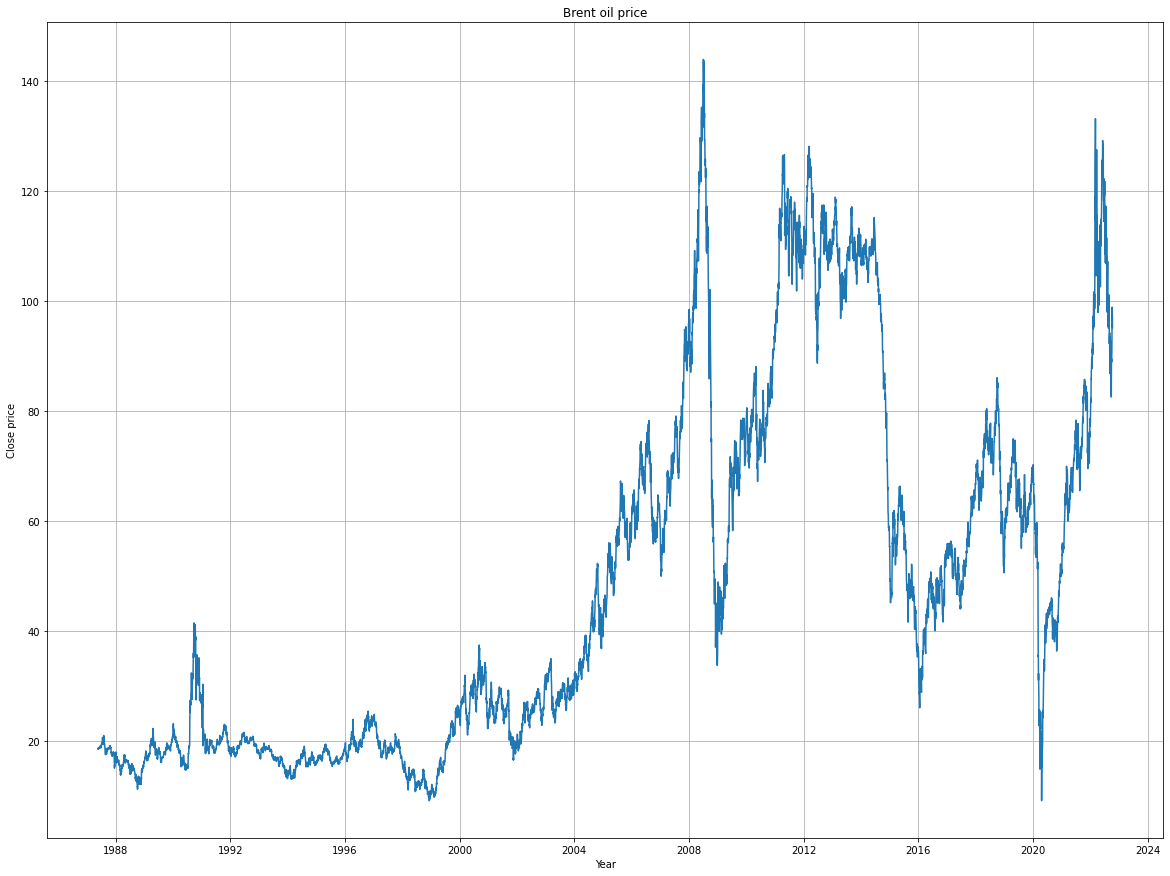

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
plt.plot(dataframe['DCOILBRENTEU'])
plt.grid()
plt.xlabel('Year')
plt.ylabel('Close price')
plt.title('Brent oil price')
plt.show()

In [16]:
daily_close = dataframe[['DCOILBRENTEU']]
daily_pct_c = daily_close.pct_change()
daily_pct_c.fillna(0, inplace=True)
print(daily_pct_c)

            DCOILBRENTEU
DATE                    
1987-05-20      0.000000
1987-05-21     -0.009662
1987-05-22      0.005420
1987-05-25      0.002695
1987-05-26      0.001613
...                  ...
2022-10-05      0.006507
2022-10-06      0.013778
2022-10-07      0.033769
2022-10-10     -0.017698
2022-10-11     -0.020179

[8985 rows x 1 columns]


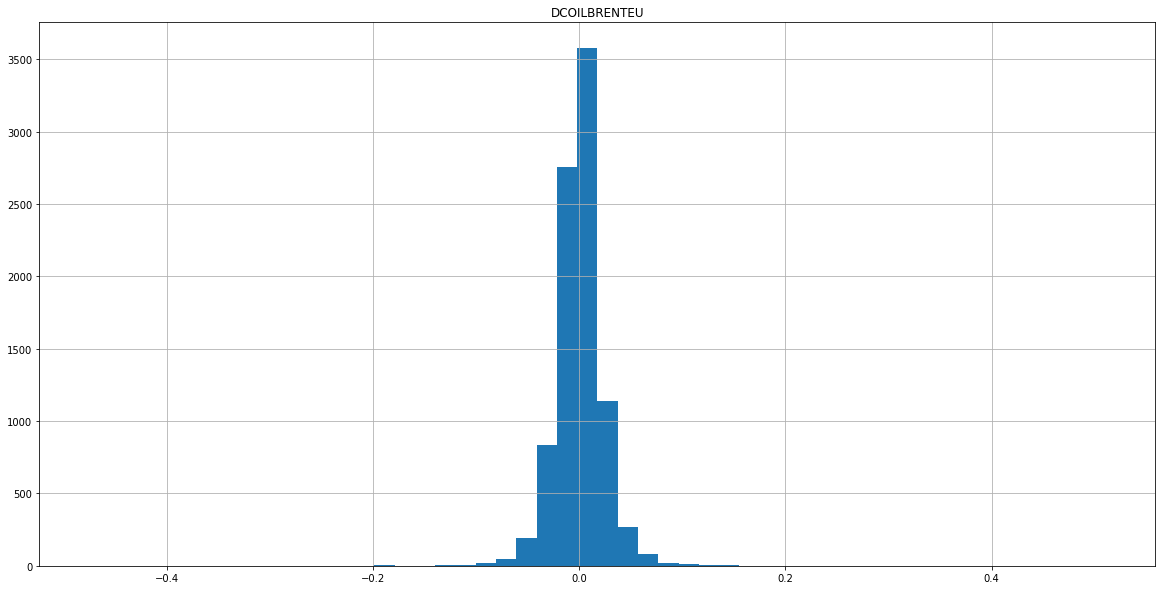

       DCOILBRENTEU
count   8985.000000
mean       0.000504
std        0.025271
min       -0.474654
25%       -0.011057
50%        0.000397
75%        0.012198
max        0.509868


In [17]:
daily_pct_c.hist(bins=50,figsize=(20,10))
plt.show()
print(daily_pct_c.describe())

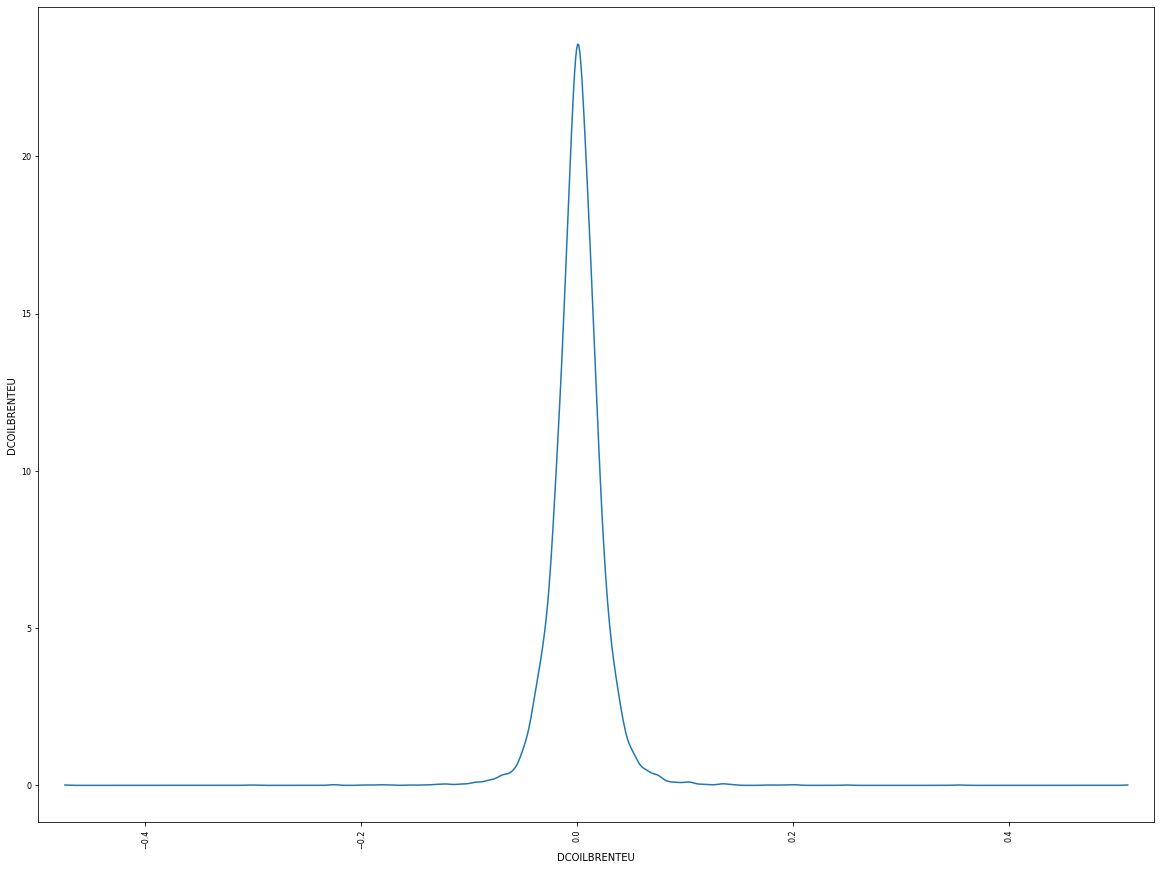

In [18]:
pd.plotting.scatter_matrix(daily_pct_c, diagonal='kde', alpha=0.1, figsize=(20,15))
plt.show()

In [ ]:
##Volatility Calculation

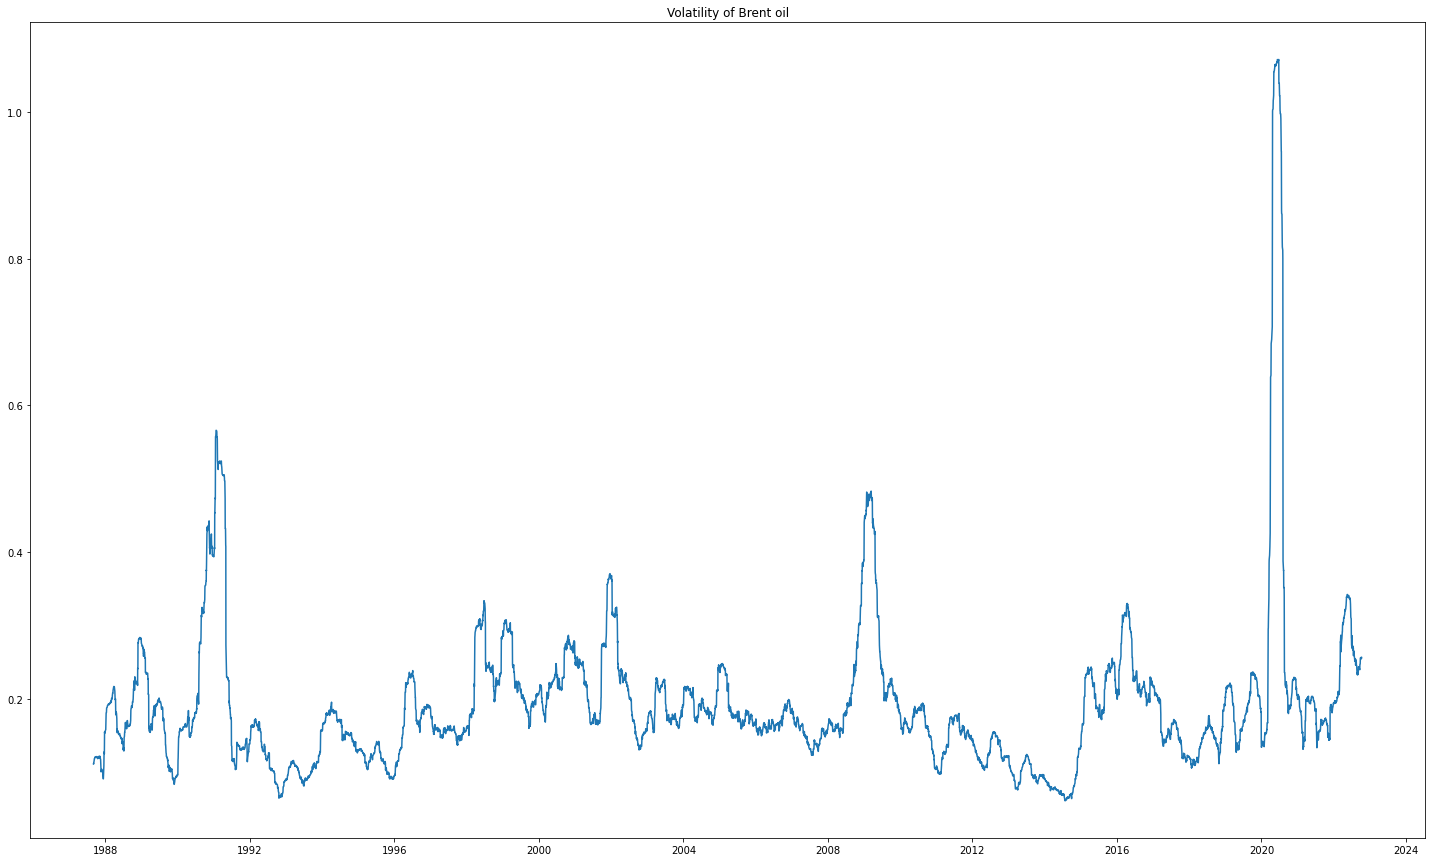

In [19]:
import numpy as np
min_periods = 75
vol = daily_pct_c.rolling(min_periods).std()*np.sqrt(min_periods)
plt.figure(figsize=(25,15))
plt.plot(vol)
plt.title('Volatility of Brent oil')
plt.show()

STRATEGY: 

In [20]:
dataframe['SMA22'] = dataframe['DCOILBRENTEU'].rolling(22).mean()

In [21]:
# removing all the NULL values using 
# dropna() method

dataframe.dropna(inplace=True)

# printing Dataframe

dataframe

DCOILBRENTEU      SMA22
DATE                               
1987-06-19         19.05  18.725000
1987-06-22         19.10  18.746364
1987-06-23         18.90  18.766818
1987-06-24         18.75  18.775909
1987-06-25         18.70  18.780455
...                  ...        ...
2022-10-05         94.35  89.931818
2022-10-06         95.65  89.996818
2022-10-07         98.88  90.335455
2022-10-10         97.13  90.803636
2022-10-11         95.17  91.130000

[8964 rows x 2 columns]

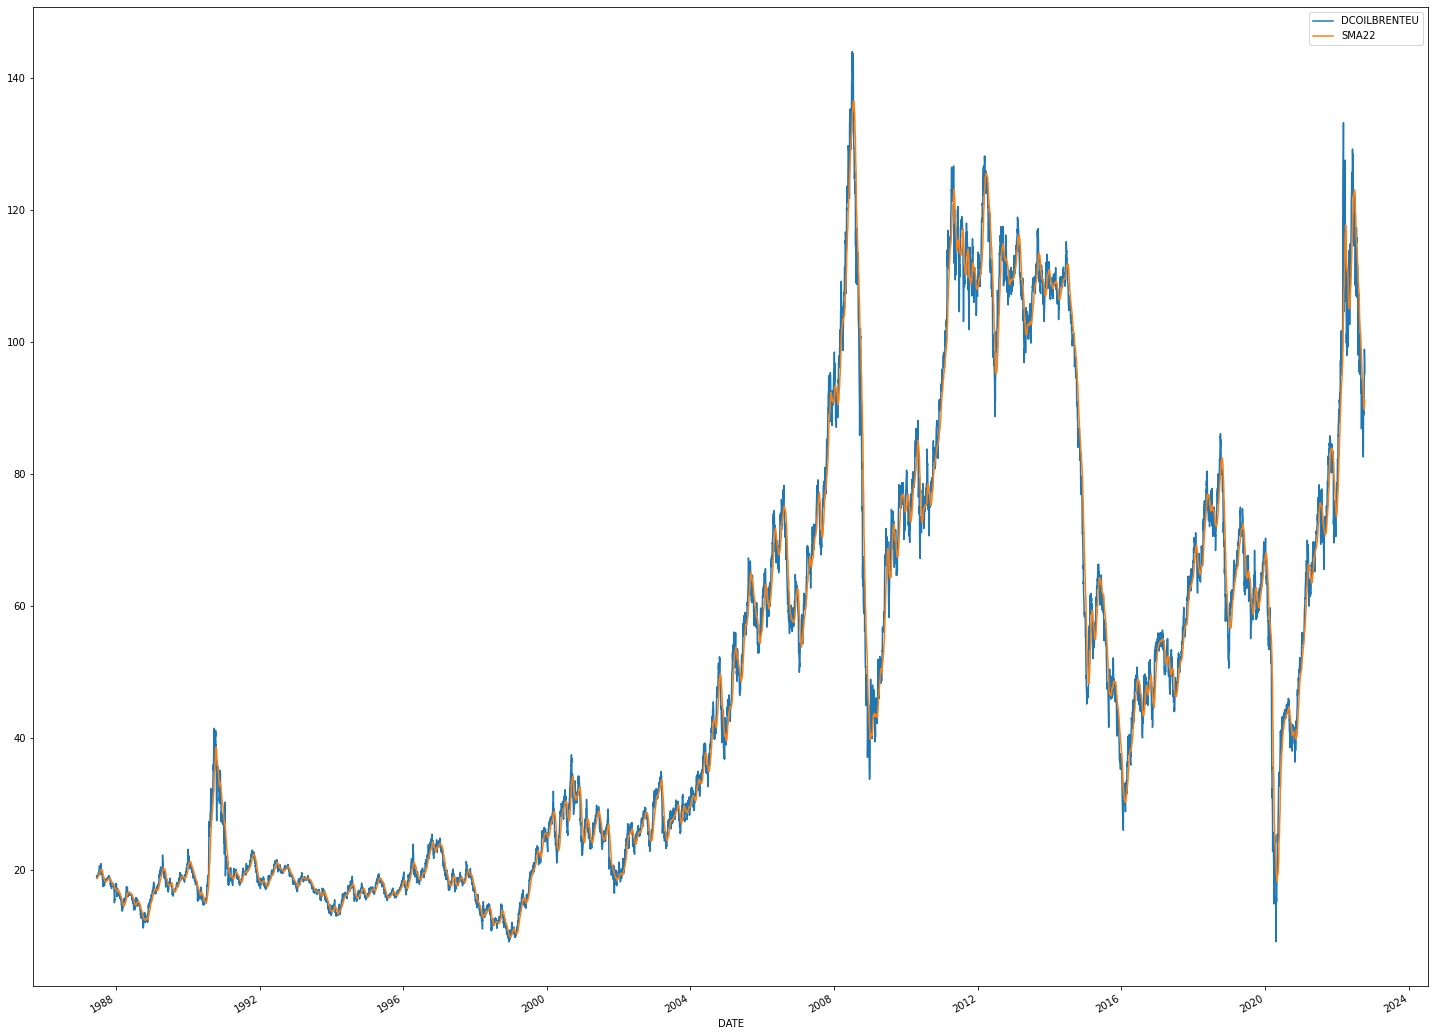

In [22]:
# plotting price and simple
# moving average of 22 days using .plot() method

dataframe[['DCOILBRENTEU', 'SMA22']].plot(label='DCOILBRENTEU',
figsize=(25,20))

In [23]:
# updating our dataFrame to have only
# one column 'DCOILBRENTEU' as rest all columns
# are of no use for us at the moment
# using .to_frame() to convert pandas
# series into dataframe.

dataframe = dataframe['DCOILBRENTEU'].to_frame()

# calculating exponential moving average
# using. ewm(span).mean() , with window size = 22

dataframe['EWMA22'] = dataframe['DCOILBRENTEU'].ewm(span=22).mean()

#printing Dataframe

dataframe

DCOILBRENTEU     EWMA22
DATE                               
1987-06-19         19.05  19.050000
1987-06-22         19.10  19.076136
1987-06-23         18.90  19.012010
1987-06-24         18.75  18.937317
1987-06-25         18.70  18.880851
...                  ...        ...
2022-10-05         94.35  91.291853
2022-10-06         95.65  91.670822
2022-10-07         98.88  92.297707
2022-10-10         97.13  92.717906
2022-10-11         95.17  92.931132

[8964 rows x 2 columns]

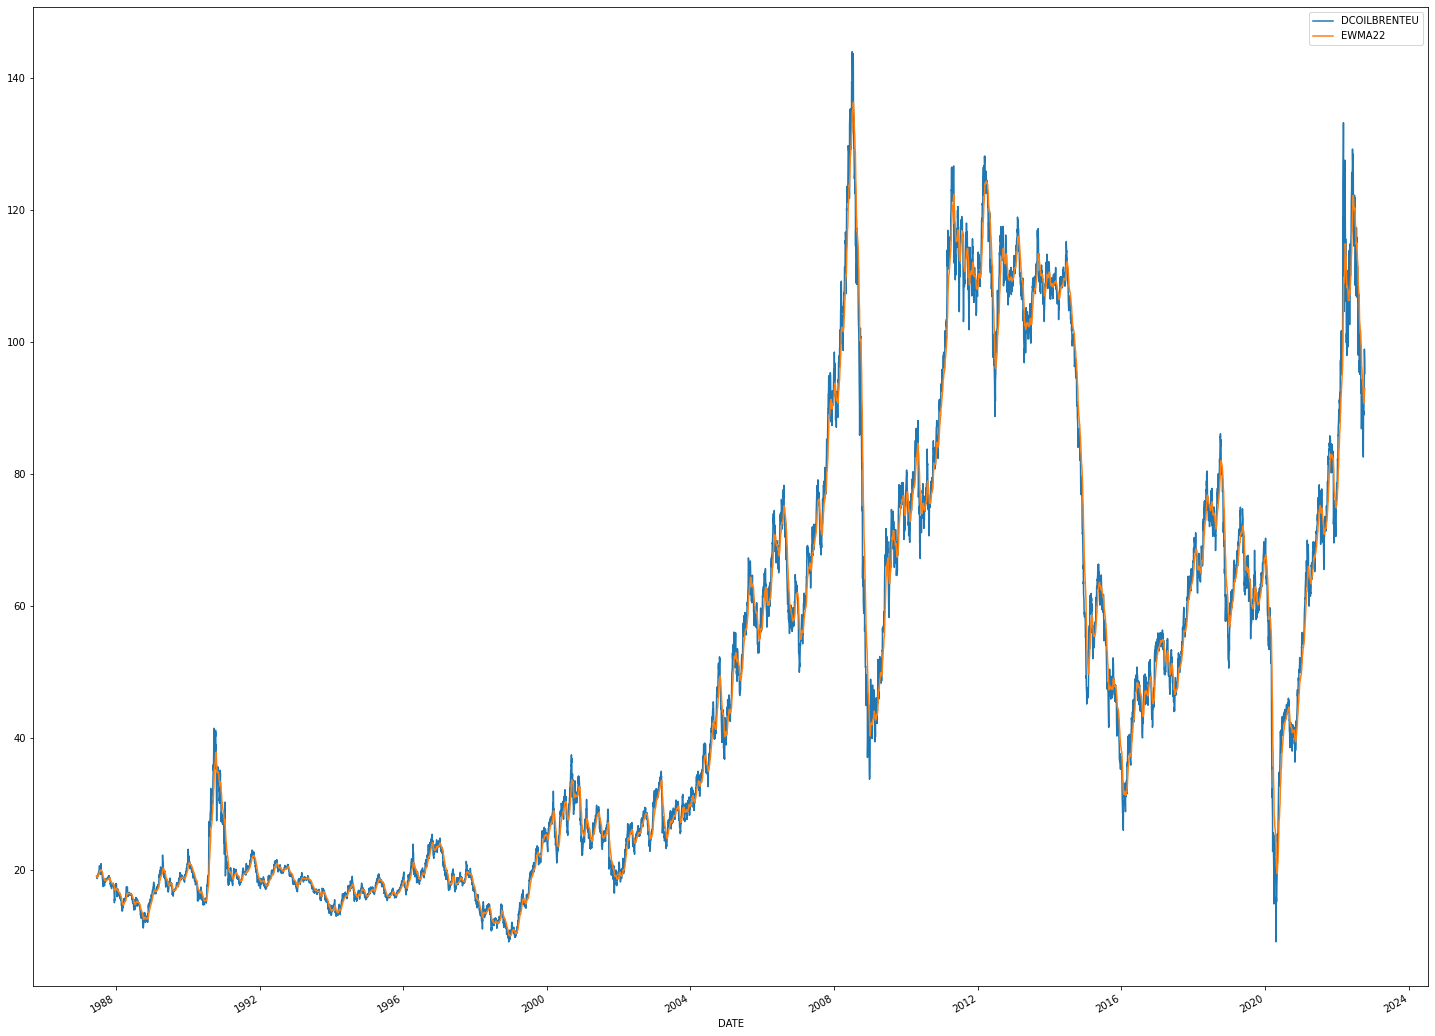

In [24]:
# plotting price and exponential
# moving average of 22 days using .plot() method

dataframe[['DCOILBRENTEU', 'EWMA22']].plot(label='dataframe',
figsize=(25,20))

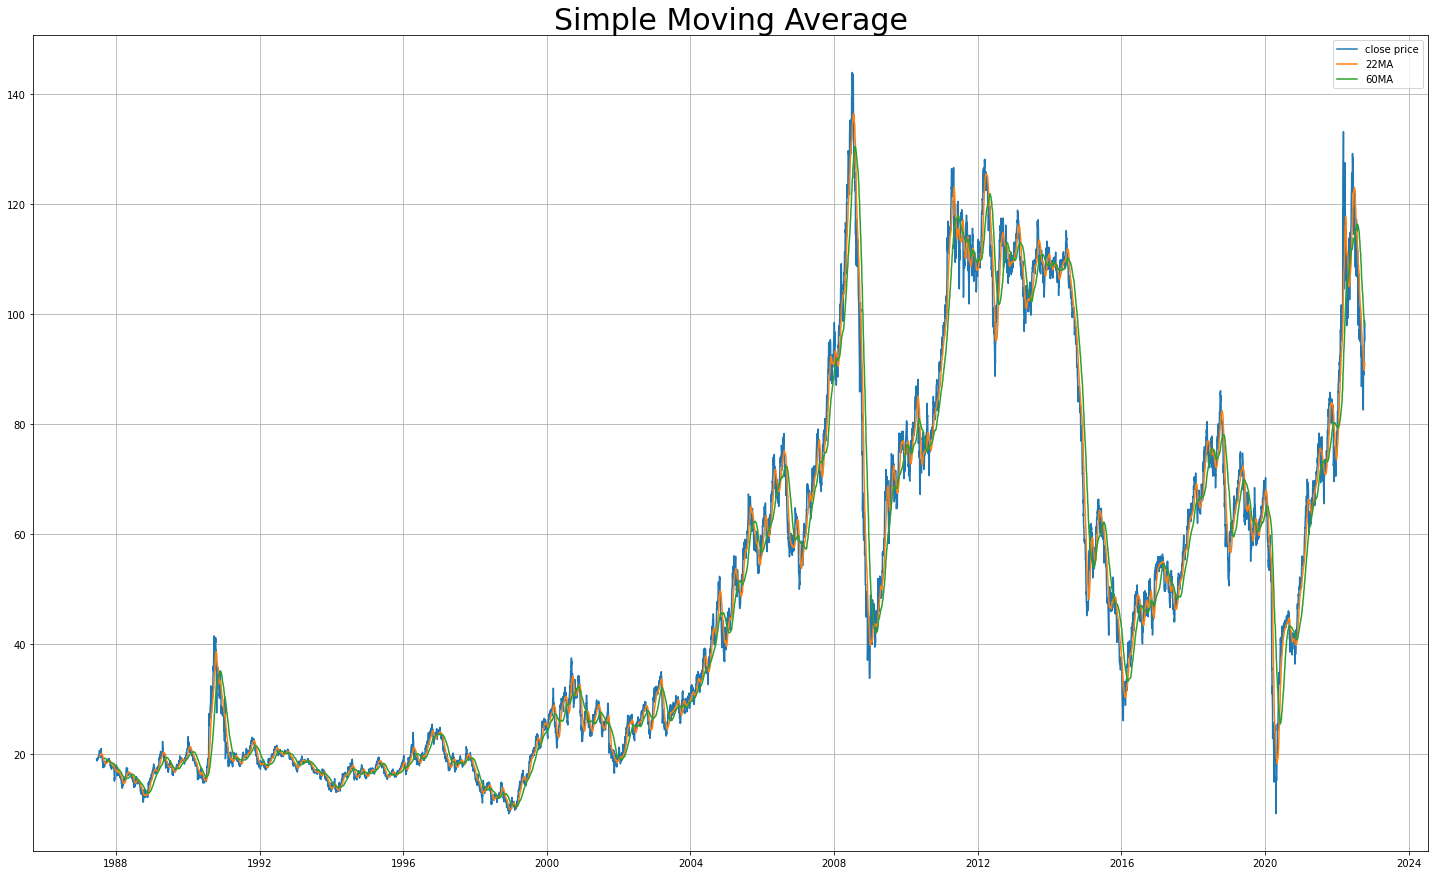

In [25]:
price = dataframe['DCOILBRENTEU']
dataframe['22'] = price.rolling(window=22).mean()
dataframe['60'] = price.rolling(window=60).mean()

plt.figure(figsize=(25,15))
plt.plot(dataframe['DCOILBRENTEU'], label='close price')
plt.plot(dataframe['22'], label='22MA')
plt.plot(dataframe['60'], label='60MA')
plt.title('Simple Moving Average', fontsize=30)
plt.grid()
plt.legend()
plt.show()

In [26]:
def run_strategy(SMA):
    data = dataframe.copy()
    data["returns"] = np.log(data.DCOILBRENTEU.div(data.DCOILBRENTEU.shift(1)))
    data["SMA_S"] = data.DCOILBRENTEU.rolling(int(SMA[0])).mean()
    data["SMA_L"] = data.DCOILBRENTEU.rolling(int(SMA[1])).mean()
    data.dropna(inplace = True)
    
    data["position"] = np.where(data["SMA_S"] > data["SMA_L"], 1, -1)
    data["strategy"] = data.position.shift(1) * data["returns"]
    data.dropna(inplace = True)
    
    
    return -data[["returns", "strategy"]].sum().apply(np.exp)[-1] # maximize absolute performance

In [ ]:
from scipy.optimize import brute

In [ ]:
brute(run_strategy, ((10, 200, 1), (10, 252, 1)))

array([12., 17.])

In [ ]:
## Trading strategy

In [27]:
short_window = 12
long_window = 17

signals = pd.DataFrame(index=dataframe.index)
signals['signal'] = 0.0

signals['short_mavg'] = dataframe['DCOILBRENTEU'].rolling(window=short_window, min_periods=1, center=False).mean()
signals['long_mavg'] = dataframe['DCOILBRENTEU'].rolling(window=long_window, min_periods=1, center=False).mean()
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:]
                                           >signals['long_mavg'][short_window:], 1.0, 0.0)

signals['positions'] = signals['signal'].diff()

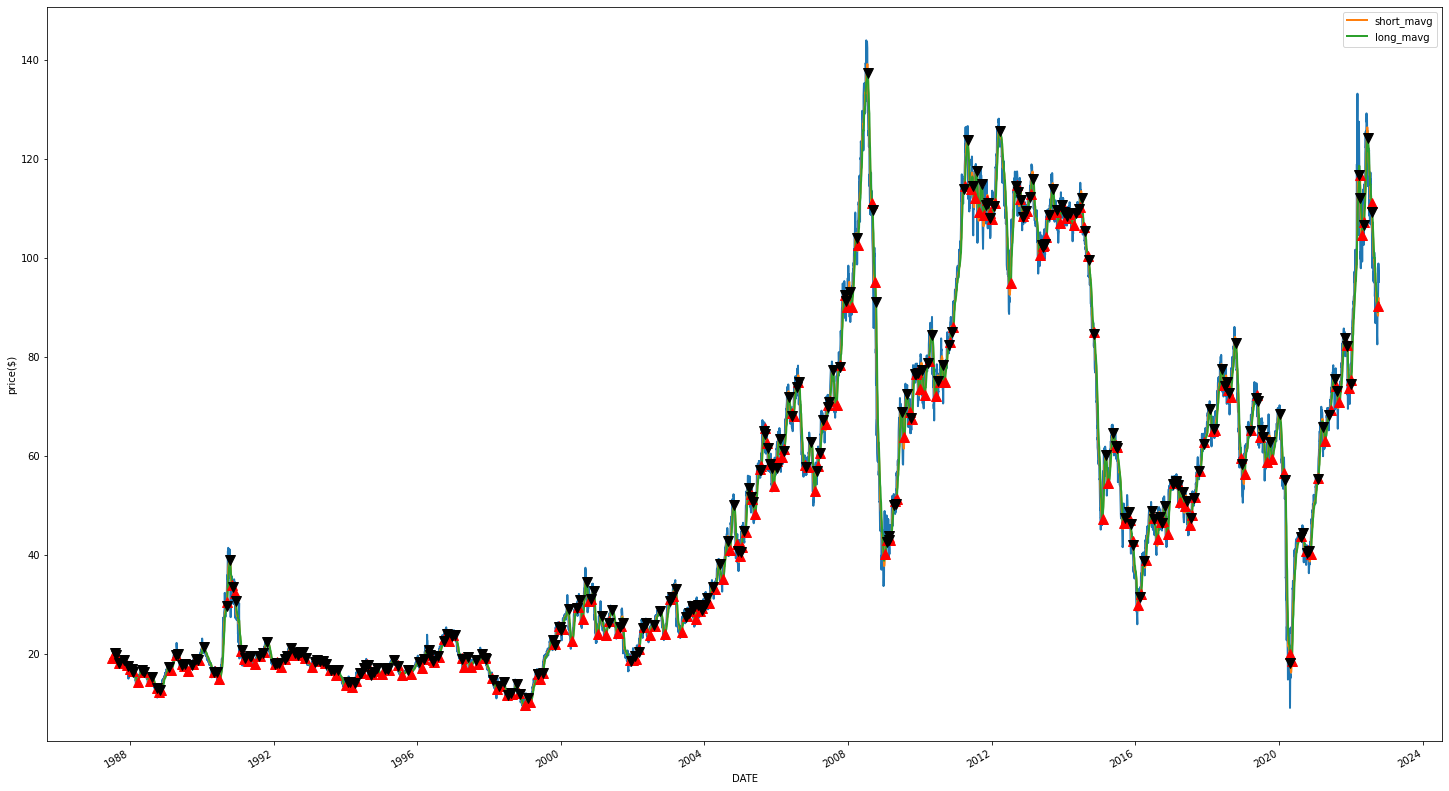

In [28]:
fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(111, ylabel='price($)')
ax1.patch.set_facecolor("white")
dataframe['DCOILBRENTEU'].plot(ax=ax1, lw=2.)
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)
ax1.plot(signals.loc[signals.positions == 1.0].index,
         signals.short_mavg[signals.positions == 1.0],
        '^', markersize=10, color='red')
ax1.plot(signals.loc[signals.positions == -1.0].index,
         signals.short_mavg[signals.positions == -1.0],
        'v', markersize=10, color='black')
plt.show()

In [ ]:
## Backtesting

In [29]:
initial_capital = float(10000.0)
positions = pd.DataFrame(index=signals.index).fillna(0.0)
positions['dataframe'] = 500*signals['signal']
portfolio = positions.multiply(dataframe['DCOILBRENTEU'], axis=0)
pos_diff = positions.diff()
portfolio['holdings'] = (positions.multiply(dataframe['DCOILBRENTEU'], axis=0)).sum(axis=1)
portfolio['cash'] = initial_capital - (pos_diff.multiply(dataframe['DCOILBRENTEU'], axis=0)).sum(axis=1).cumsum()
portfolio['total'] = portfolio['cash'] + portfolio['holdings']
portfolio['returns'] = portfolio['total'].pct_change()

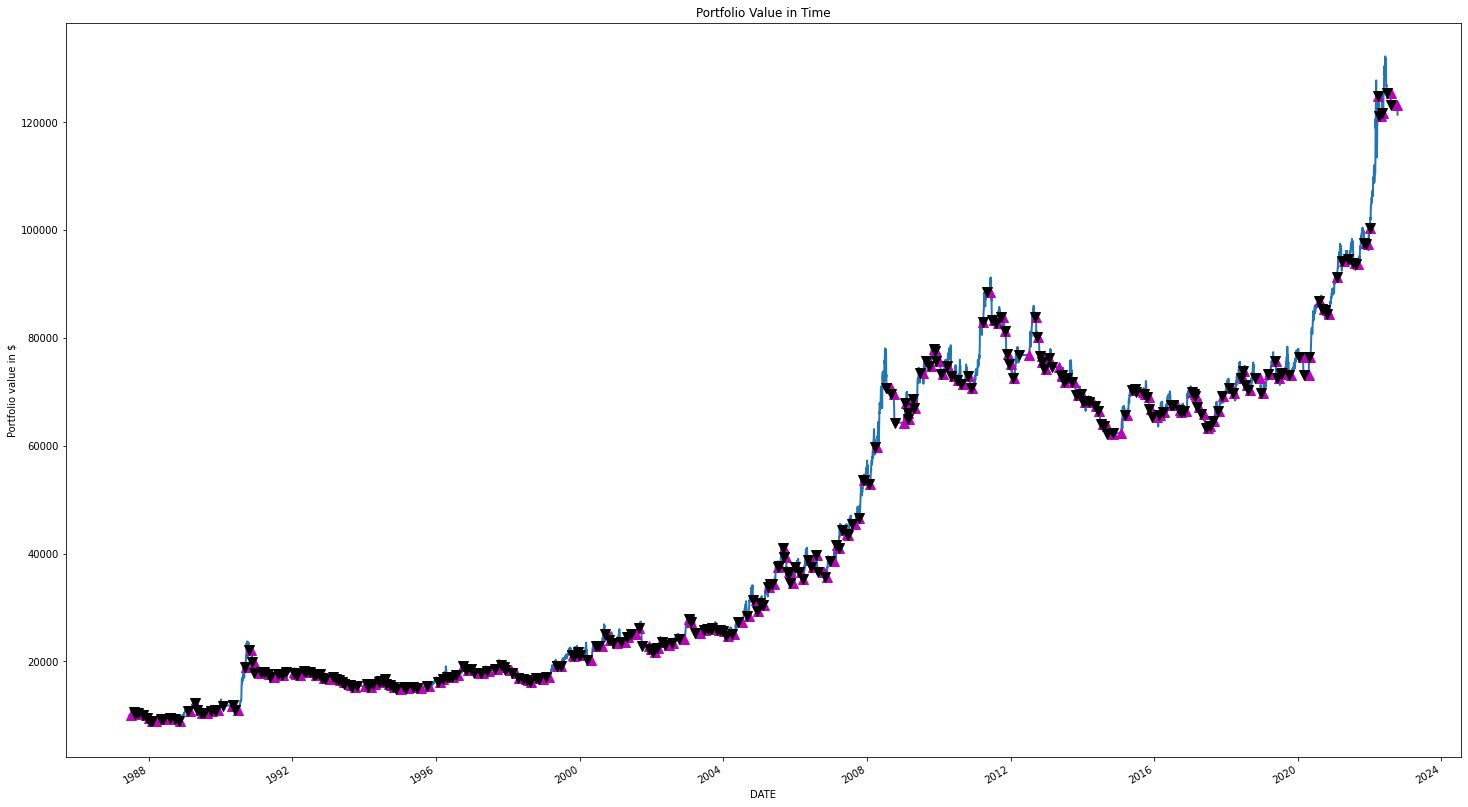

In [30]:
fig = plt.figure(figsize=(25,15))
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')
ax1.patch.set_facecolor("white")
portfolio['total'].plot(ax=ax1, lw=2.)
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')
plt.title('Portfolio Value in Time')
plt.show()

In [40]:
portfolio['cummax'] = portfolio['total'].cummax()
portfolio['drawdown'] = portfolio['total'] - portfolio['cummax']
portfolio['drawdown_pct'] = portfolio['drawdown'] / portfolio['cummax'] * 100
max_drawdown = portfolio['drawdown_pct'].min()
max_drawdown_date = portfolio.loc[portfolio['drawdown_pct'].idxmin()].name

print("Maximum Drawdown: {:.2f}%".format(max_drawdown))
print("Maximum Drawdown Date: {}".format(max_drawdown_date))


Maximum Drawdown: -37.84%
Maximum Drawdown Date: 1995-01-10 00:00:00


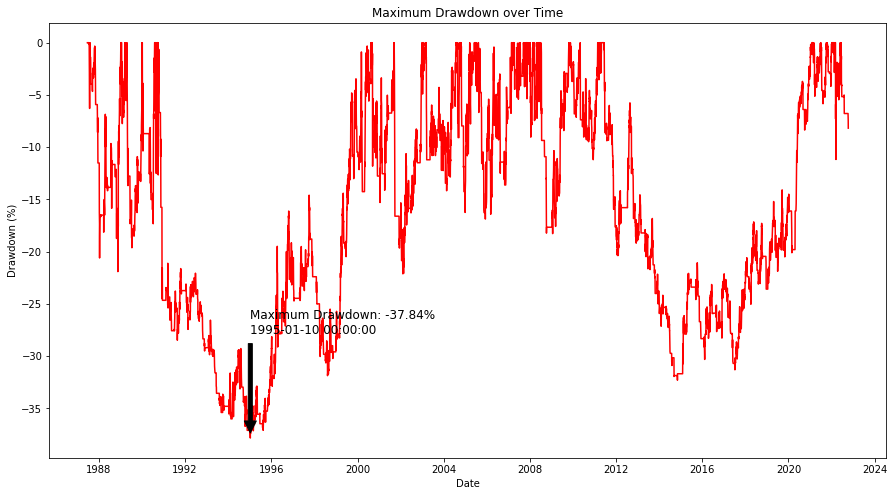

In [43]:
import matplotlib.pyplot as plt

# Calculate maximum drawdown
portfolio['cummax'] = portfolio['total'].cummax()
portfolio['drawdown'] = portfolio['total'] - portfolio['cummax']
portfolio['drawdown_pct'] = portfolio['drawdown'] / portfolio['cummax'] * 100
max_drawdown = portfolio['drawdown_pct'].min()
max_drawdown_date = portfolio.loc[portfolio['drawdown_pct'].idxmin()].name


# Plot maximum drawdown over time
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(portfolio.index, portfolio['drawdown_pct'], color='red')
ax.set_title('Maximum Drawdown over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Drawdown (%)')
ax.annotate('Maximum Drawdown: {:.2f}%\n{}'.format(max_drawdown, max_drawdown_date),
            xy=(max_drawdown_date, max_drawdown), xytext=(max_drawdown_date, max_drawdown+10),
            arrowprops=dict(facecolor='black', shrink=0.05), fontsize=12)
plt.show()


# Time_series_model_for_Brent_oil

In [ ]:
import pandas as pd
from prophet import Prophet
import pandas as pd
import io
from google.colab import files

In [ ]:
upload = files.upload()

Saving Brent Price2.csv to Brent Price2.csv


In [ ]:
df = pd.read_csv("Brent Price2.csv")
df.head()

DS      Y
0  1987/5/20  18.63
1  1987/5/21  18.45
2  1987/5/22  18.55
3  1987/5/25  18.60
4  1987/5/26  18.63

In [ ]:
df.rename(columns={'column_name_1': 'ds', 'column_name_2': 'y'}, inplace=True)

In [ ]:
df.head()

DS      Y
0  1987/5/20  18.63
1  1987/5/21  18.45
2  1987/5/22  18.55
3  1987/5/25  18.60
4  1987/5/26  18.63

In [ ]:
import pandas as pd

# Replace 'df' with the name of your dataframe
# Replace 'date_column' with the name of the column containing the dates
df['DS'] = pd.to_datetime(df['DS'], format='%Y/%m/%d').dt.strftime('%Y-%m-%d')

In [ ]:
import pandas as pd

# Replace 'date_column' and 'value_column' with the names of the corresponding columns in your dataframe
df['ds'] = df['DS']
df['y'] = df['Y']

# Drop the original columns if they are no longer needed
df.drop(['DS', 'Y'], axis=1, inplace=True)


In [ ]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_b7g4m6e/wuh2j00v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_b7g4m6e/vxnwo6xj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96459', 'data', 'file=/tmp/tmp_b7g4m6e/wuh2j00v.json', 'init=/tmp/tmp_b7g4m6e/vxnwo6xj.json', 'output', 'file=/tmp/tmp_b7g4m6e/prophet_modelkmi2_hii/prophet_model-20230201161522.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:15:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:15:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
9345 2023-10-07
9346 2023-10-08
9347 2023-10-09
9348 2023-10-10
9349 2023-10-11

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
9345 2023-10-07  89.239289   73.323659  104.563100
9346 2023-10-08  89.246865   74.956027  102.879451
9347 2023-10-09  87.673718   73.532196  102.980808
9348 2023-10-10  87.566709   71.712523  102.937433
9349 2023-10-11  87.571194   72.059843  102.190916

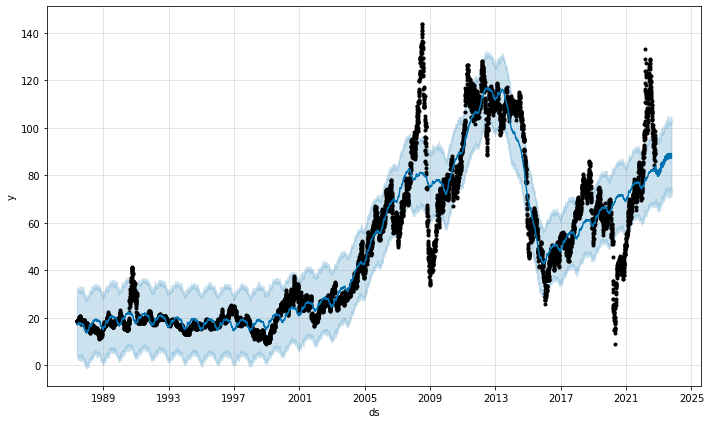

In [ ]:
fig1 = m.plot(forecast)

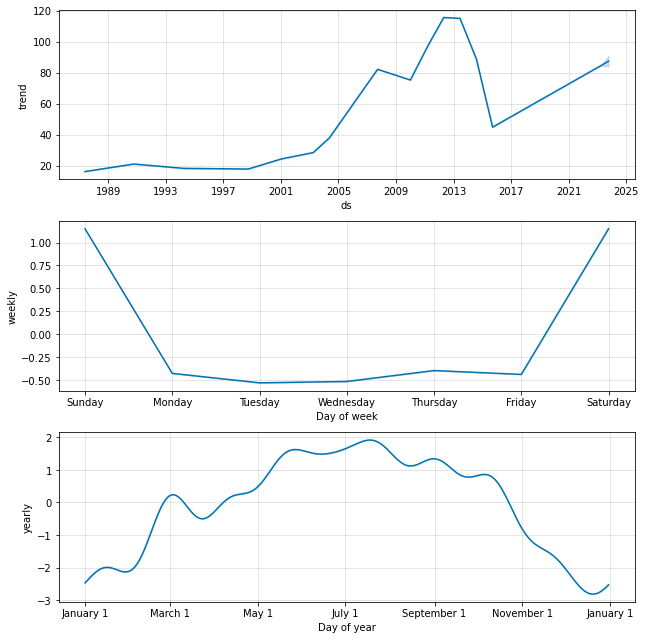

In [ ]:
fig2 = m.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)

In [ ]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')

INFO:prophet:Making 66 forecasts with cutoffs between 1989-09-29 00:00:00 and 2021-10-11 00:00:00


  0%|          | 0/66 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_b7g4m6e/tuw_ox6i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_b7g4m6e/q3k61ltb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=9269', 'data', 'file=/tmp/tmp_b7g4m6e/tuw_ox6i.json', 'init=/tmp/tmp_b7g4m6e/q3k61ltb.json', 'output', 'file=/tmp/tmp_b7g4m6e/prophet_modelyazrewz7/prophet_model-20230201164420.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:44:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:44:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_b7g4m6e/18coz0bu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_b7g4m6e/kkod4d0l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/li

In [ ]:
df_cv.head()

ds       yhat  yhat_lower  yhat_upper      y     cutoff
0 1989-10-02  16.485877   15.718240   17.277379  18.58 1989-09-29
1 1989-10-03  16.449350   15.698226   17.191162  18.73 1989-09-29
2 1989-10-04  16.453550   15.626046   17.268864  18.78 1989-09-29
3 1989-10-05  16.478212   15.709595   17.256151  18.43 1989-09-29
4 1989-10-06  16.479465   15.705607   17.230361  18.45 1989-09-29

In [ ]:
cutoffs = pd.to_datetime(['2013-02-15', '2013-08-15', '2014-02-15'])
df_cv2 = cross_validation(m, cutoffs=cutoffs, horizon='366 days')

  0%|          | 0/3 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp66kgmn4f/f8m7cu5u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66kgmn4f/8vac_i4x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96245', 'data', 'file=/tmp/tmp66kgmn4f/f8m7cu5u.json', 'init=/tmp/tmp66kgmn4f/8vac_i4x.json', 'output', 'file=/tmp/tmp66kgmn4f/prophet_model8pvk0947/prophet_model-20230129174254.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:42:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:42:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66kgmn4f/xgjcrtv0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp66kgmn4f/eown2rbn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/l

In [ ]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

horizon         mse       rmse        mae      mape     mdape     smape  \
0 12 days  303.011172  17.407216  11.195576  0.229681  0.141097  0.215015   
1 13 days  305.602819  17.481499  11.297934  0.232755  0.143645  0.217873   
2 14 days  308.634484  17.567996  11.416836  0.234706  0.144951  0.220474   
3 15 days  309.803508  17.601236  11.488725  0.234340  0.147353  0.221472   
4 16 days  316.243901  17.783248  11.615926  0.236002  0.151768  0.223155   

   coverage  
0  0.442630  
1  0.431957  
2  0.421845  
3  0.413475  
4  0.407728

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:544: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.8/dist-packages/prophet/plot.py:545: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



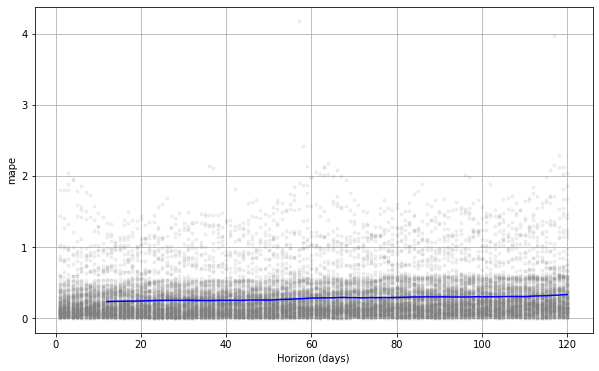

In [ ]:
from prophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

In [ ]:
#### Autocorrelation for return fo Brent oil

In [ ]:
df = pd.read_csv("/content/Return2 (1).csv")

In [ ]:
df.head()

DATE   Return
0  1987/5/21 -0.00422
1  1987/5/22  0.00235
2  1987/5/25  0.00117
3  1987/5/26  0.00070
4  1987/5/27 -0.00070

In [ ]:
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
Dataviz_df = df.copy()

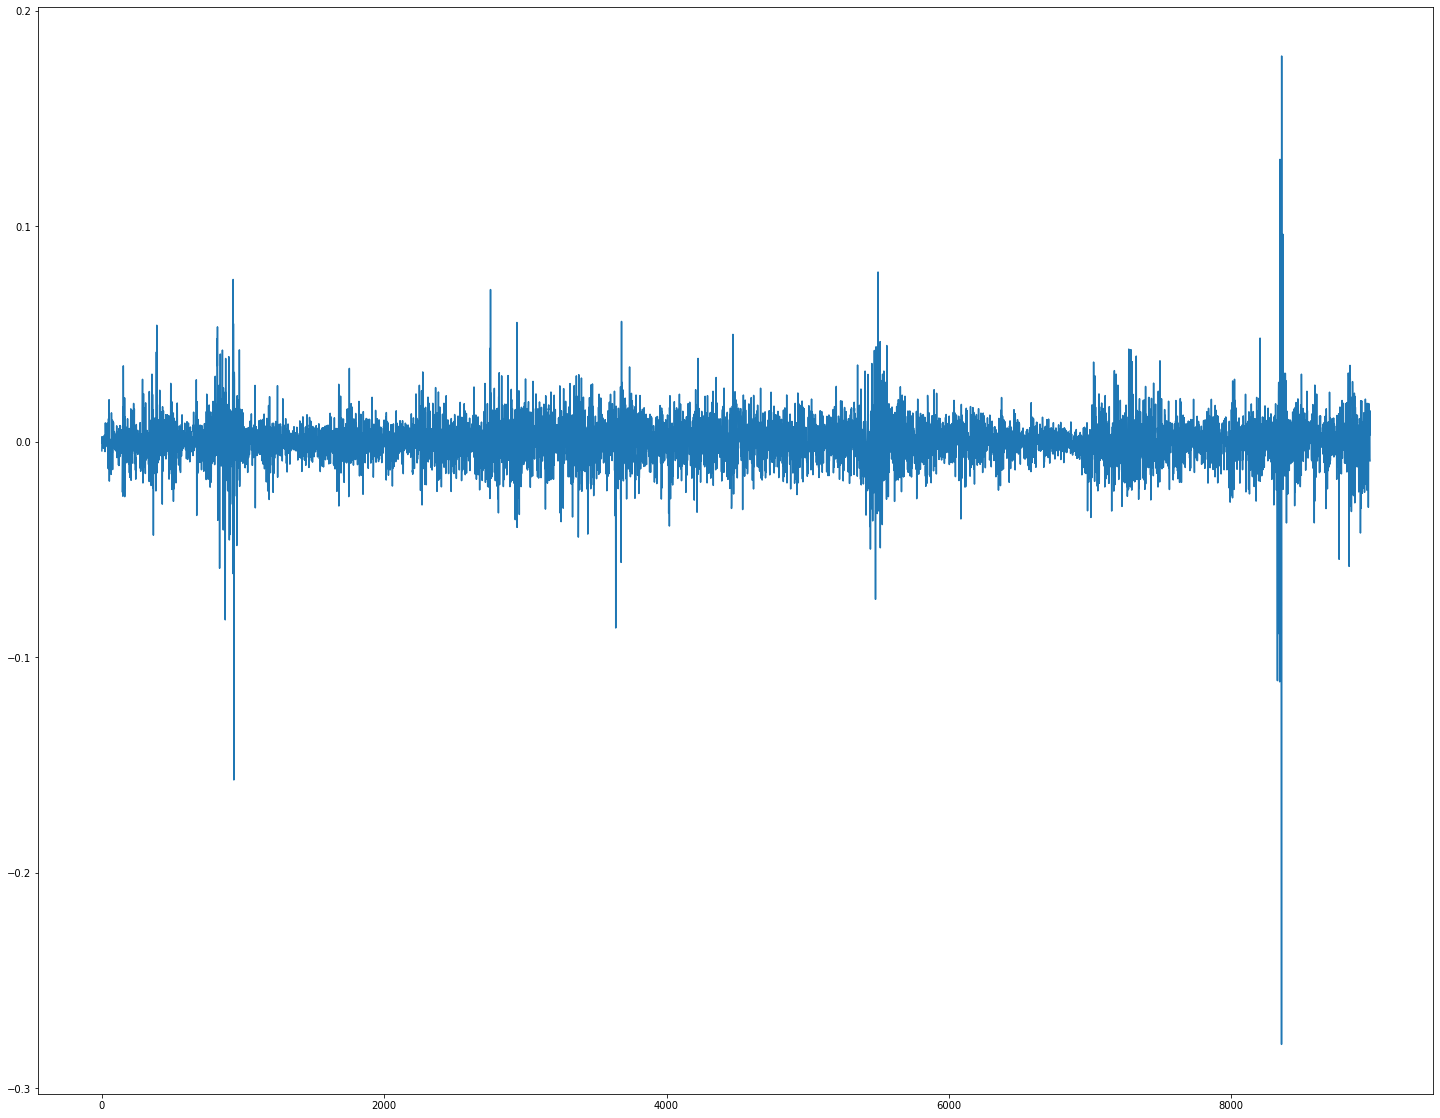

In [ ]:
plt.figure(figsize=(25,20))
Dataviz_df['Return'].plot()

In [ ]:
Dataviz_df.index = Dataviz_df['DATE'] 

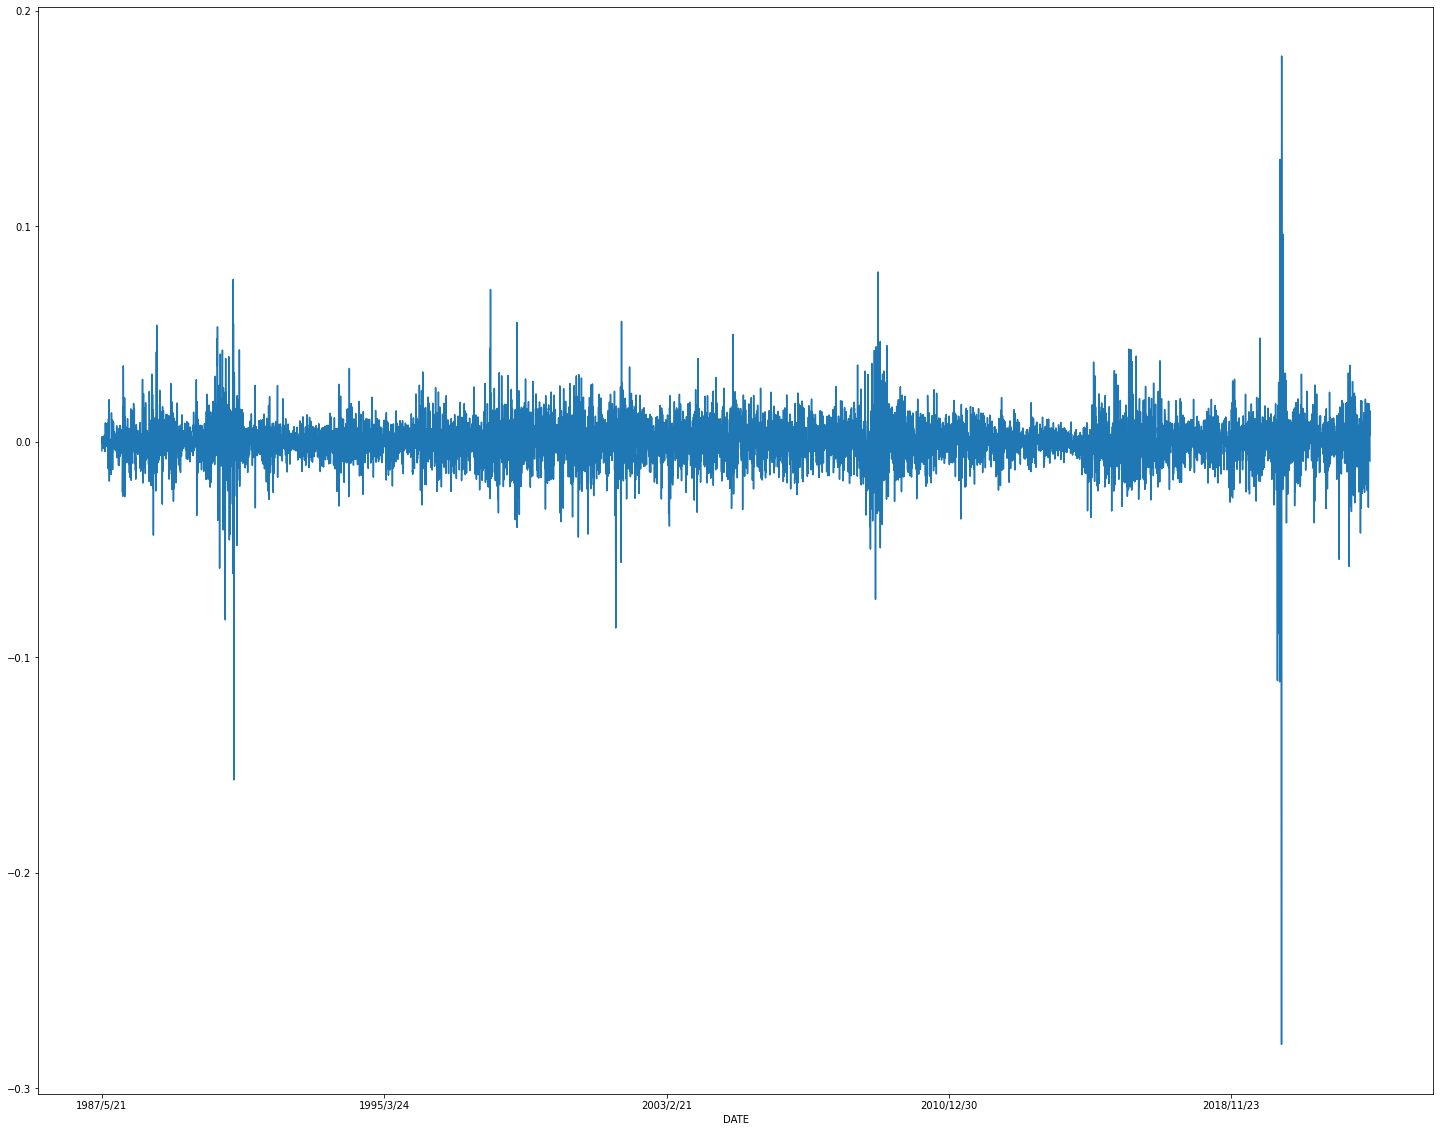

In [ ]:
plt.figure(figsize=(25,20))
Dataviz_df['Return'].plot()

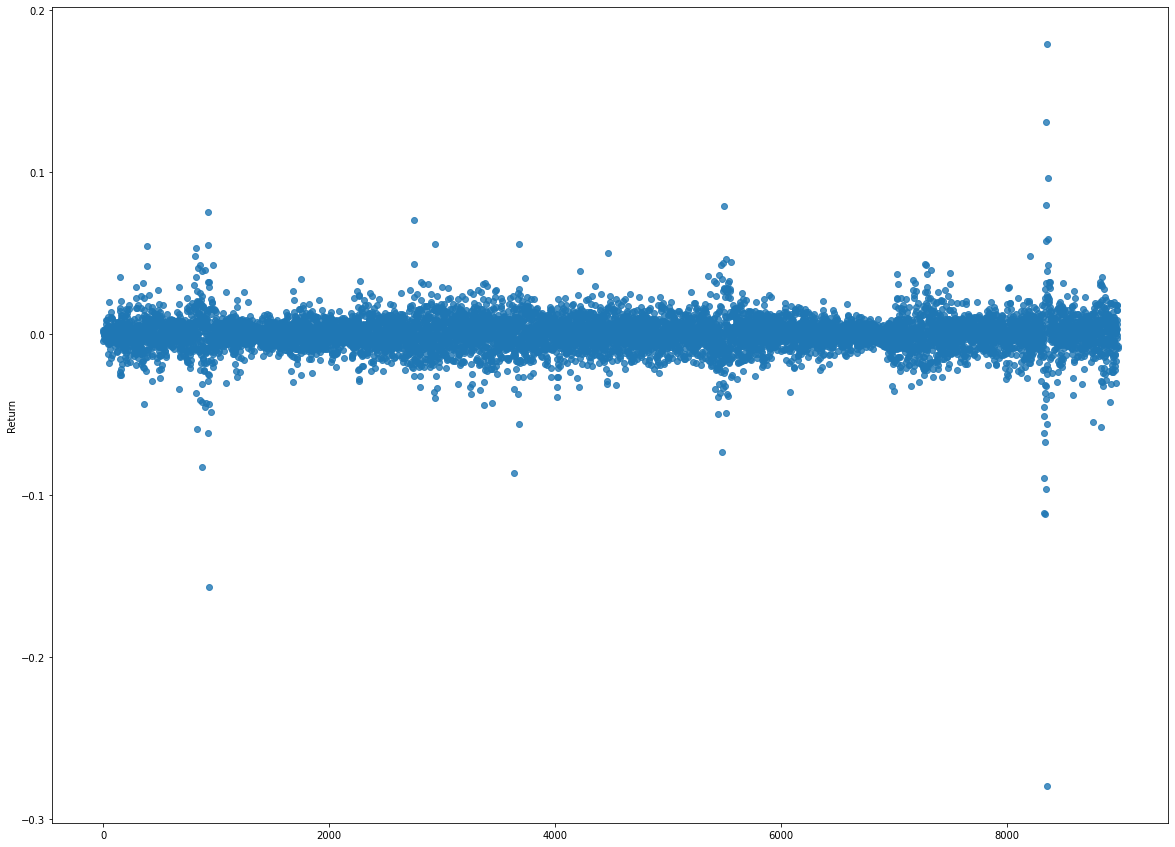

In [ ]:
import seaborn as sns
plt.figure(figsize=(20,15))
sns.regplot(x= df.index.values, y=df['Return'])

In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['year'] = df['DATE'].dt.year
df['year'] =df['DATE'].dt.year

In [ ]:
df.head()

DATE   Return  year
0 1987-05-21 -0.00422  1987
1 1987-05-22  0.00235  1987
2 1987-05-25  0.00117  1987
3 1987-05-26  0.00070  1987
4 1987-05-27 -0.00070  1987

In [ ]:
df.groupby('year')['Return'].mean()

year
1987   -0.000155
1988   -0.000138
1989    0.000444
1990    0.000505
1991   -0.000791
1992    0.000009
1993   -0.000523
1994    0.000359
1995    0.000238
1996    0.000424
1997   -0.000718
1998   -0.000701
1999    0.001501
2000   -0.000170
2001   -0.000261
2002    0.000754
2003    0.000010
2004    0.000478
2005    0.000622
2006    0.000018
2007    0.000804
2008   -0.001650
2009    0.001339
2010    0.000310
2011    0.000259
2012    0.000043
2013   -0.000013
2014   -0.001176
2015   -0.000701
2016    0.000692
2017    0.000329
2018   -0.000478
2019    0.000495
2020   -0.000477
2021    0.000705
2022    0.000463
Name: Return, dtype: float64

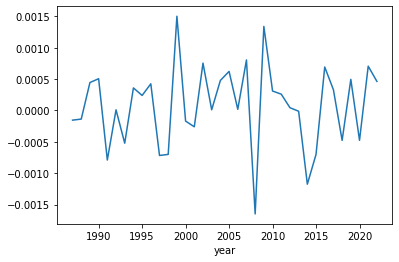

In [ ]:
df.groupby('year')['Return'].mean().plot()

In [ ]:
df['lag1'] =  df['Return'].shift(1)

In [ ]:
df.head()

DATE   Return  year     lag1
0 1987-05-21 -0.00422  1987      NaN
1 1987-05-22  0.00235  1987 -0.00422
2 1987-05-25  0.00117  1987  0.00235
3 1987-05-26  0.00070  1987  0.00117
4 1987-05-27 -0.00070  1987  0.00070

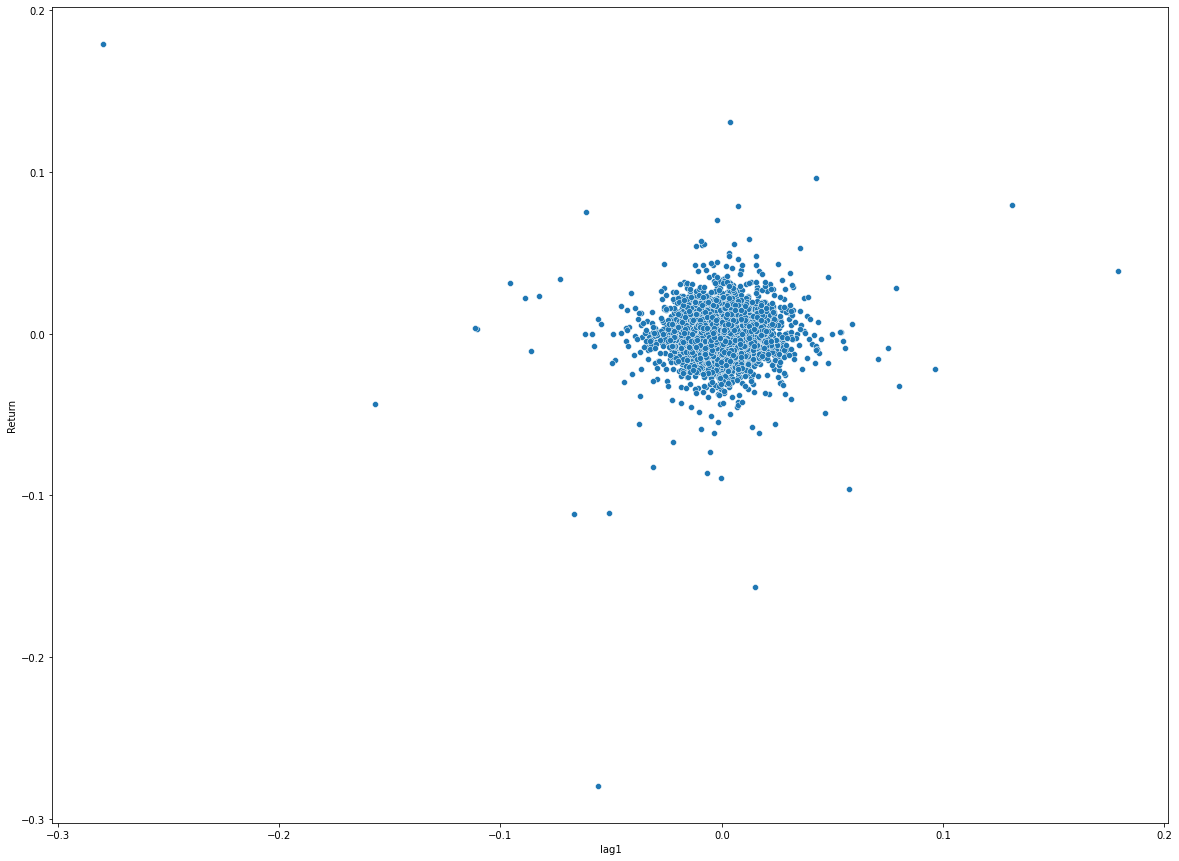

In [ ]:
plt.figure(figsize=(20,15))
sns.scatterplot(x=df['lag1'], y=df['Return'])

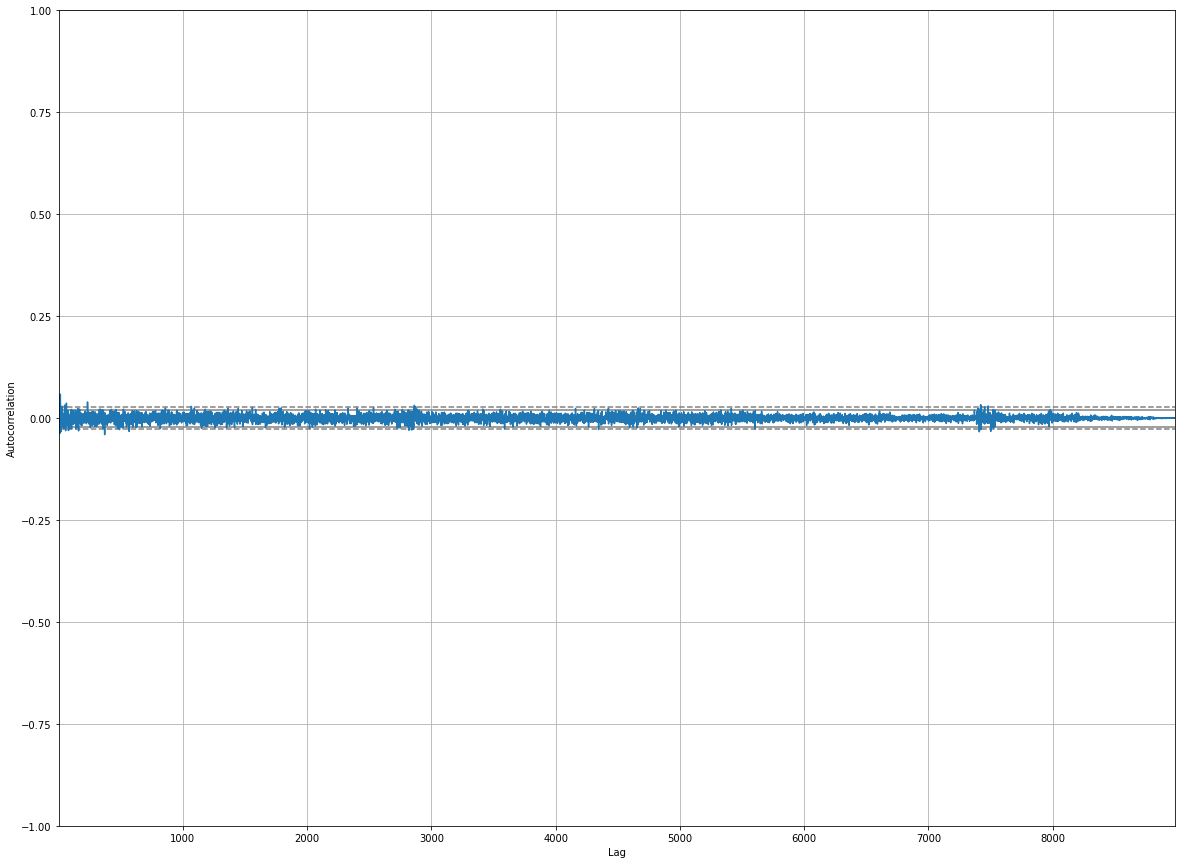

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20,15))
autocorrelation_plot(df['Return'])

(0.0, 22.0)

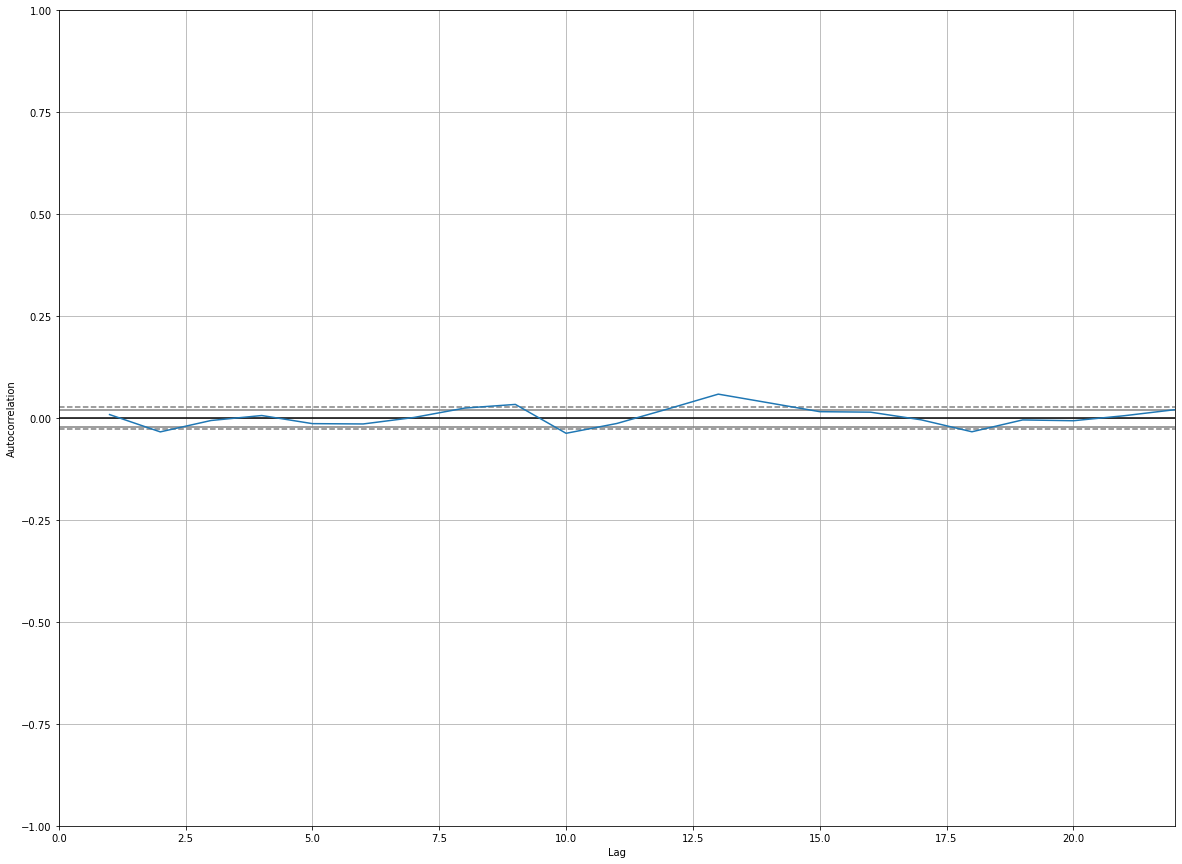

In [ ]:
from pandas.plotting import autocorrelation_plot
plt.figure(figsize=(20,15))
autocorrelation_plot(df['Return'])
plt.xlim(0, 22)

In [ ]:
### ML for Brent oil price

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.metrics import r2_score
sns.set_theme(style='darkgrid')
%matplotlib inline

In [ ]:
upload = files.upload()

Saving Brent Price1.csv to Brent Price1.csv


In [ ]:
df = pd.read_csv('Data for machine learning.csv')

In [ ]:
df.head()

DATE  DCOILBRENTEU  exports_OBS_VALUE_SUM  imports_OBS_VALUE_SUM  \
0  2013-01-31        115.55                83372.0               206989.0   
1  2013-02-28        112.20                80511.0               187480.0   
2  2013-03-31        108.46                85967.0               199947.0   
3  2013-04-30        101.53                81863.0               197259.0   
4  2013-05-31        100.43                94535.0               211170.0   

   stock_levels_OBS_VALUE_SUM  
0                    589006.0  
1                    600310.0  
2                    603441.0  
3                    600384.0  
4                    595176.0

In [ ]:
df.shape

(116, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   DATE                        116 non-null    object 
 1   DCOILBRENTEU                116 non-null    float64
 2   exports_OBS_VALUE_SUM       116 non-null    float64
 3   imports_OBS_VALUE_SUM       116 non-null    float64
 4   stock_levels_OBS_VALUE_SUM  116 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.7+ KB


In [ ]:
df.isnull().sum()

DATE                          0
DCOILBRENTEU                  0
exports_OBS_VALUE_SUM         0
imports_OBS_VALUE_SUM         0
stock_levels_OBS_VALUE_SUM    0
dtype: int64

In [ ]:
df.describe()

DCOILBRENTEU  exports_OBS_VALUE_SUM  imports_OBS_VALUE_SUM  \
count    116.000000             116.000000             116.000000   
mean      70.004655           92678.093302          215230.392595   
std       25.225635           15071.867239           35519.382829   
min       14.850000            4033.790000           18129.711000   
25%       50.292500           85856.500000          205663.500000   
50%       64.765000           95075.500000          214740.000000   
75%       86.215000           99193.050500          227513.250000   
max      125.530000          118170.152000          291858.776000   

       stock_levels_OBS_VALUE_SUM  
count                  116.000000  
mean                576104.277655  
std                  90836.130418  
min                  50434.953000  
25%                 584770.250000  
50%                 600104.898000  
75%                 618790.432000  
max                 654882.627000

In [ ]:
df.duplicated().sum()

0

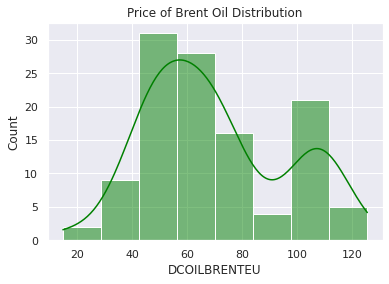

In [ ]:
plt.title("Price of Brent Oil Distribution")
sns.histplot(data=df,x='DCOILBRENTEU',kde=True,color='green')
plt.show()

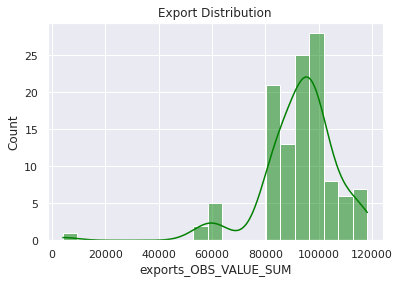

In [ ]:
plt.title("Export Distribution")
sns.histplot(data=df,x='exports_OBS_VALUE_SUM',kde=True,color='green')
plt.show()

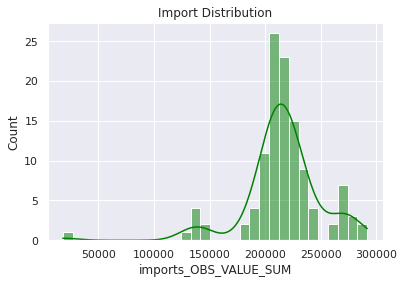

In [ ]:
plt.title("Import Distribution")
sns.histplot(data=df,x='imports_OBS_VALUE_SUM',kde=True,color='green')
plt.show()

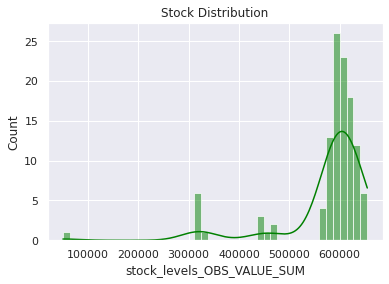

In [ ]:
plt.title("Stock Distribution")
sns.histplot(data=df,x='stock_levels_OBS_VALUE_SUM',kde=True,color='green')
plt.show()

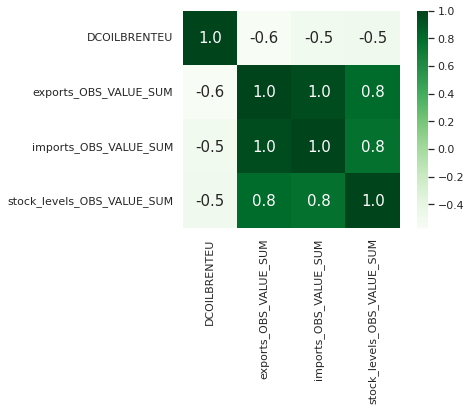

In [ ]:
correlation = df.corr()
sns.heatmap(correlation,cbar=True,square=True, fmt='.1f',annot=True,annot_kws={'size':15},cmap='Greens')
plt.show()

In [ ]:
correlation['DCOILBRENTEU']

DCOILBRENTEU                  1.000000
exports_OBS_VALUE_SUM        -0.573818
imports_OBS_VALUE_SUM        -0.504743
stock_levels_OBS_VALUE_SUM   -0.494492
Name: DCOILBRENTEU, dtype: float64

In [ ]:
X = df.drop(columns=['DCOILBRENTEU','DATE'],axis=1)
y = df['DCOILBRENTEU']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2)

In [ ]:
model = RandomForestRegressor(n_estimators = 100)

In [ ]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
train_data_predictions = model.predict(X_train)
test_data_predictions = model.predict(X_test)

In [ ]:
r2_score(test_data_predictions,y_test)

0.7067567301650066

In [ ]:
X_test

exports_OBS_VALUE_SUM  imports_OBS_VALUE_SUM  stock_levels_OBS_VALUE_SUM
24               90962.000             210639.000                  571271.000
89               97490.736             221331.058                  654882.627
28               93352.000             212807.000                  601406.000
56              100456.000             212912.000                  613907.000
2                85967.000             199947.000                  603441.000
53               96561.000             218427.000                  622361.000
45               96002.000             216188.000                  622455.000
79              111275.756             283318.812                  598933.588
61               92940.000             206443.000                  602540.000
30               96731.000             218351.000                  601468.000
44               95464.000             215842.000                  630421.000
25               85003.000             198258.000                  584135.000
106              84497.559             200041.283                  443601.752
100             103091.859             243755.645                  618478.576
13               80859.000             178022.000                  590837.000
14               81786.000             190475.000                  582615.000
101             106418.767             235620.790                  623526.226
91               94623.025             236874.364                  648264.593
5                81557.000             197078.000                  583554.000
73              105426.528             264630.056                  587015.644
41               89453.000             213555.000                  628827.000
60               97155.000             228300.000                  590479.000
29               93548.000             210311.000                  607736.000
11               81384.000             195437.000                  585433.000
81              116624.350             277102.160                  602367.276
35               97394.000             223072.000                  608579.000
21               92005.000             215797.000                  586727.000
16               83718.000             205744.000                  580478.000
0                83372.000             206989.000                  589006.000
27              102555.000             208969.000                  599946.000
3                81863.000             197259.000                  600384.000
36               91451.000             212051.000                  620642.000
65               87130.000             207866.000                  592364.000
55               95529.000             219936.000                  620223.000
74              118089.024             276151.800                  601929.508

In [ ]:
test_data_predictions

array([ 72.9259,  45.3264,  74.9125,  55.798 , 108.2358,  49.4767,
        49.301 ,  64.75  ,  69.9718,  68.4186,  44.7331,  98.9696,
        83.8941,  55.4286, 110.4067, 108.6368,  49.0056,  40.5361,
       106.0936,  66.1557,  47.0245,  70.812 ,  53.6854, 105.4598,
        66.1649,  53.2457,  71.3418, 101.3124, 105.9472,  71.5338,
       108.3276,  52.2533,  98.6839,  53.7414,  67.639 ])

In [ ]:
X_test1 = X_test.copy()
X_test1["test_data_predictions"] = test_data_predictions
X_test1

exports_OBS_VALUE_SUM  imports_OBS_VALUE_SUM  stock_levels_OBS_VALUE_SUM  \
24               90962.000             210639.000                  571271.000   
89               97490.736             221331.058                  654882.627   
28               93352.000             212807.000                  601406.000   
56              100456.000             212912.000                  613907.000   
2                85967.000             199947.000                  603441.000   
53               96561.000             218427.000                  622361.000   
45               96002.000             216188.000                  622455.000   
79              111275.756             283318.812                  598933.588   
61               92940.000             206443.000                  602540.000   
30               96731.000             218351.000                  601468.000   
44               95464.000             215842.000                  630421.000   
25               85003.000             198258.000                  584135.000   
106              84497.559             200041.283                  443601.752   
100             103091.859             243755.645                  618478.576   
13               80859.000             178022.000                  590837.000   
14               81786.000             190475.000                  582615.000   
101             106418.767             235620.790                  623526.226   
91               94623.025             236874.364                  648264.593   
5                81557.000             197078.000                  583554.000   
73              105426.528             264630.056                  587015.644   
41               89453.000             213555.000                  628827.000   
60               97155.000             228300.000                  590479.000   
29               93548.000             210311.000                  607736.000   
11               81384.000             195437.000                  585433.000   
81              116624.350             277102.160                  602367.276   
35               97394.000             223072.000                  608579.000   
21               92005.000             215797.000                  586727.000   
16               83718.000             205744.000                  580478.000   
0                83372.000             206989.000                  589006.000   
27              102555.000             208969.000                  599946.000   
3                81863.000             197259.000                  600384.000   
36               91451.000             212051.000                  620642.000   
65               87130.000             207866.000                  592364.000   
55               95529.000             219936.000                  620223.000   
74              118089.024             276151.800                  601929.508   

     test_data_predictions  
24                 72.9259  
89                 45.3264  
28                 74.9125  
56                 55.7980  
2                 108.2358  
53                 49.4767  
45                 49.3010  
79                 64.7500  
61                 69.9718  
30                 68.4186  
44                 44.7331  
25                 98.9696  
106                83.8941  
100                55.4286  
13                110.4067  
14                108.6368  
101                49.0056  
91                 40.5361  
5                 106.0936  
73                 66.1557  
41                 47.0245  
60                 70.8120  
29                 53.6854  
11                105.4598  
81                 66.1649  
35                 53.2457  
21                 71.3418  
16                101.3124  
0                 105.9472  
27                 71.5338  
3                 108.3276  
36                 52.2533  
65                 98.6839  
55                 53.7414  
74                 67.6390

In [ ]:
## LSTM Model

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')
import pandas as pd
import io
from google.colab import files

import warnings

warnings.filterwarnings('ignore')

In [2]:
import io
from google.colab import files
plt.style.use("seaborn")
upload = files.upload()

Saving Brent Price1.csv to Brent Price1 (1).csv


In [3]:
df = pd.read_csv('Brent Price1.csv')

In [4]:
df

DATE  DCOILBRENTEU
0      1987/5/20         18.63
1      1987/5/21         18.45
2      1987/5/22         18.55
3      1987/5/25         18.60
4      1987/5/26         18.63
...          ...           ...
8980   2022/10/5         94.35
8981   2022/10/6         95.65
8982   2022/10/7         98.88
8983  2022/10/10         97.13
8984  2022/10/11         95.17

[8985 rows x 2 columns]

In [5]:
df.shape

(8985, 2)

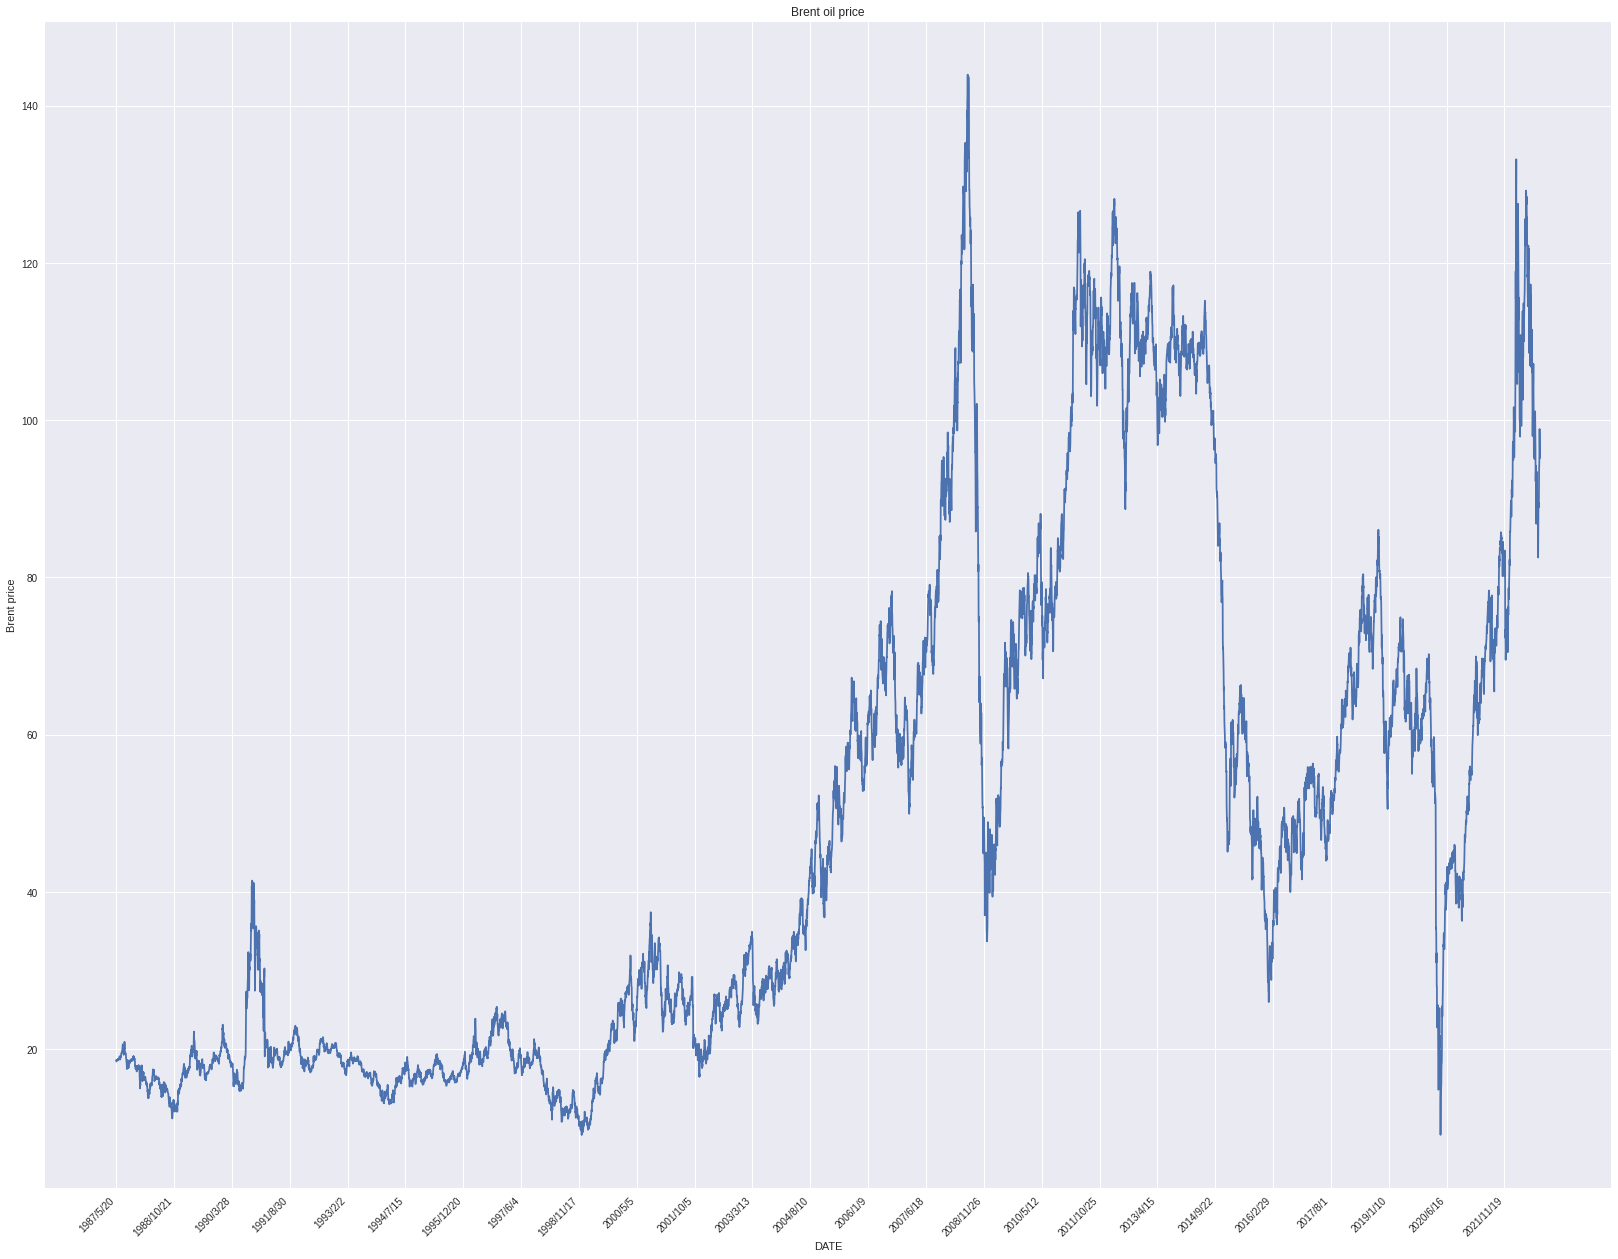

In [6]:
#visualize the Brent prices
plt.figure(figsize=(25,20))
plt.title('Brent oil price')
plt.plot(df["DCOILBRENTEU"])
plt.xticks(df.index[::365], df['DATE'][::365], rotation=45, ha='right', fontsize=10)
plt.xlabel('DATE')
plt.ylabel('Brent price')
plt.show()

In [7]:
#create new database with only required coloumns
data=df.filter(['DCOILBRENTEU'])
#convert the dataframe to numpy array
dataset=data.values
#get the number of rows to train 80 percent
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len

7188

In [8]:
#scale the data
scaler=StandardScaler() 
scaled_data=scaler.fit_transform(dataset)
print("MEAN of processed data: ",scaled_data.mean())
print("Standard deviation of processed data: ",scaled_data.std())

MEAN of processed data:  -1.834679072858578e-16
Standard deviation of processed data:  1.0


In [9]:
#create the training data
#create scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data to x_train and y_train
x_train=[]
y_train=[]
for i in range(7,len(train_data)):
  x_train.append(train_data[i-7:i])
  y_train.append(train_data[i])

In [10]:
#convert x_train and y_train into numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)
x_train.shape

(7181, 7, 1)

In [11]:
#reshape the data
print("x_train shape before reshaping",x_train.shape)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) 
#np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
print("x_train shape after reshaping",x_train.shape)

x_train shape before reshaping (7181, 7, 1)
x_train shape after reshaping (7181, 7, 1)


In [12]:
#build LSTM model
model= Sequential()
model.add(LSTM(2000,return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(2000,return_sequences=False))
model.add(Dense(1000))
model.add(Dense(500))
model.add(Dense(1)) 

In [13]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 2000)           16016000  
                                                                 
 lstm_1 (LSTM)               (None, 2000)              32008000  
                                                                 
 dense (Dense)               (None, 1000)              2001000   
                                                                 
 dense_1 (Dense)             (None, 500)               500500    
                                                                 
 dense_2 (Dense)             (None, 1)                 501       
                                                                 
Total params: 50,526,001
Trainable params: 50,526,001
Non-trainable params: 0
_________________________________________________________________


In [15]:
print(len(x_train))
print(x_train.shape)

7181
(7181, 7, 1)


In [16]:
#train the model
history = model.fit(x_train,y_train,epochs=10)

Epoch 1/10
225/225 [==============================] - 23s 46ms/step - loss: 0.0629
Epoch 2/10
225/225 [==============================] - 10s 46ms/step - loss: 0.0023
Epoch 3/10
225/225 [==============================] - 10s 45ms/step - loss: 0.0025
Epoch 4/10
225/225 [==============================] - 10s 44ms/step - loss: 0.0021
Epoch 5/10
225/225 [==============================] - 10s 45ms/step - loss: 0.0018
Epoch 6/10
225/225 [==============================] - 10s 44ms/step - loss: 0.0016
Epoch 7/10
225/225 [==============================] - 10s 44ms/step - loss: 0.0018
Epoch 8/10
225/225 [==============================] - 10s 44ms/step - loss: 0.0019
Epoch 9/10
225/225 [==============================] - 10s 44ms/step - loss: 0.0017
Epoch 10/10
225/225 [==============================] - 10s 45ms/step - loss: 0.0018


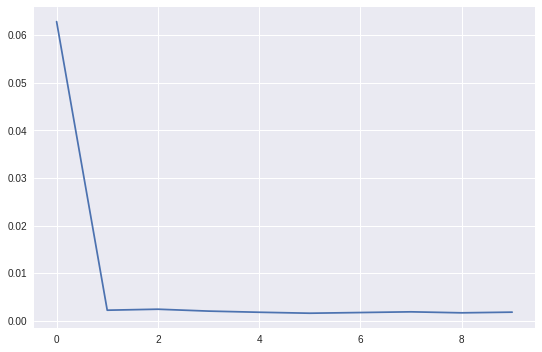

In [17]:
plt.plot(history.history['loss'])

In [18]:
#create the testing dataset
#createt new array
test_data=scaled_data[training_data_len-7:, :]
#create the dataset x_test and y_test
x_test=[]
y_test=dataset[training_data_len: , :]
for i in range(7,len(test_data)):
  x_test.append(test_data[i-7:i, 0])

In [19]:
#convert the data to numpy 
x_test=np.array(x_test)
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
#get the model predicted value
predictions =model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
print(predictions)

57/57 [==============================] - 2s 17ms/step
[[ 47.293495]
 [ 47.421093]
 [ 46.496113]
 ...
 [ 97.531906]
 [100.77451 ]
 [ 98.7544  ]]


In [20]:
from sklearn.metrics import r2_score
r2_score(predictions,y_test)

0.9916547914734185

In [21]:
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

# calculate MAPE
mape = mean_absolute_percentage_error(y_test, predictions)

print('MAPE:', mape)


MAPE: 0.021973463692674642


In [22]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print("Mean squared error: ", mse)


Mean squared error:  3.7167679227678385


In [23]:
import math
rmse = math.sqrt(mse)
print("RMSE:", rmse)


RMSE: 1.9278920931338037


In [24]:
import datetime
# Get the number of predicted samples
num_predictions = predictions.shape[0]

# Get the current time
now = datetime.datetime.now()

time = [] 

# Iterate over the predictions and timestamps, and print the prediction and timestamp
for i in range(num_predictions):
  # Calculate the prediction timestamp by adding the number of days to the current time
  prediction_timestamp = now + datetime.timedelta(days=i)
  print("Prediction:", predictions[i], "Timestamp:", prediction_timestamp)
  time. append (str(prediction_timestamp))


Prediction: [47.293495] Timestamp: 2023-02-15 17:36:05.397365
Prediction: [47.421093] Timestamp: 2023-02-16 17:36:05.397365
Prediction: [46.496113] Timestamp: 2023-02-17 17:36:05.397365
Prediction: [48.087048] Timestamp: 2023-02-18 17:36:05.397365
Prediction: [47.053905] Timestamp: 2023-02-19 17:36:05.397365
Prediction: [47.337143] Timestamp: 2023-02-20 17:36:05.397365
Prediction: [45.800816] Timestamp: 2023-02-21 17:36:05.397365
Prediction: [47.68053] Timestamp: 2023-02-22 17:36:05.397365
Prediction: [47.307056] Timestamp: 2023-02-23 17:36:05.397365
Prediction: [47.61817] Timestamp: 2023-02-24 17:36:05.397365
Prediction: [46.386265] Timestamp: 2023-02-25 17:36:05.397365
Prediction: [49.74761] Timestamp: 2023-02-26 17:36:05.397365
Prediction: [51.796745] Timestamp: 2023-02-27 17:36:05.397365
Prediction: [52.15752] Timestamp: 2023-02-28 17:36:05.397365
Prediction: [52.335754] Timestamp: 2023-03-01 17:36:05.397365
Prediction: [52.138622] Timestamp: 2023-03-02 17:36:05.397365
Prediction: 

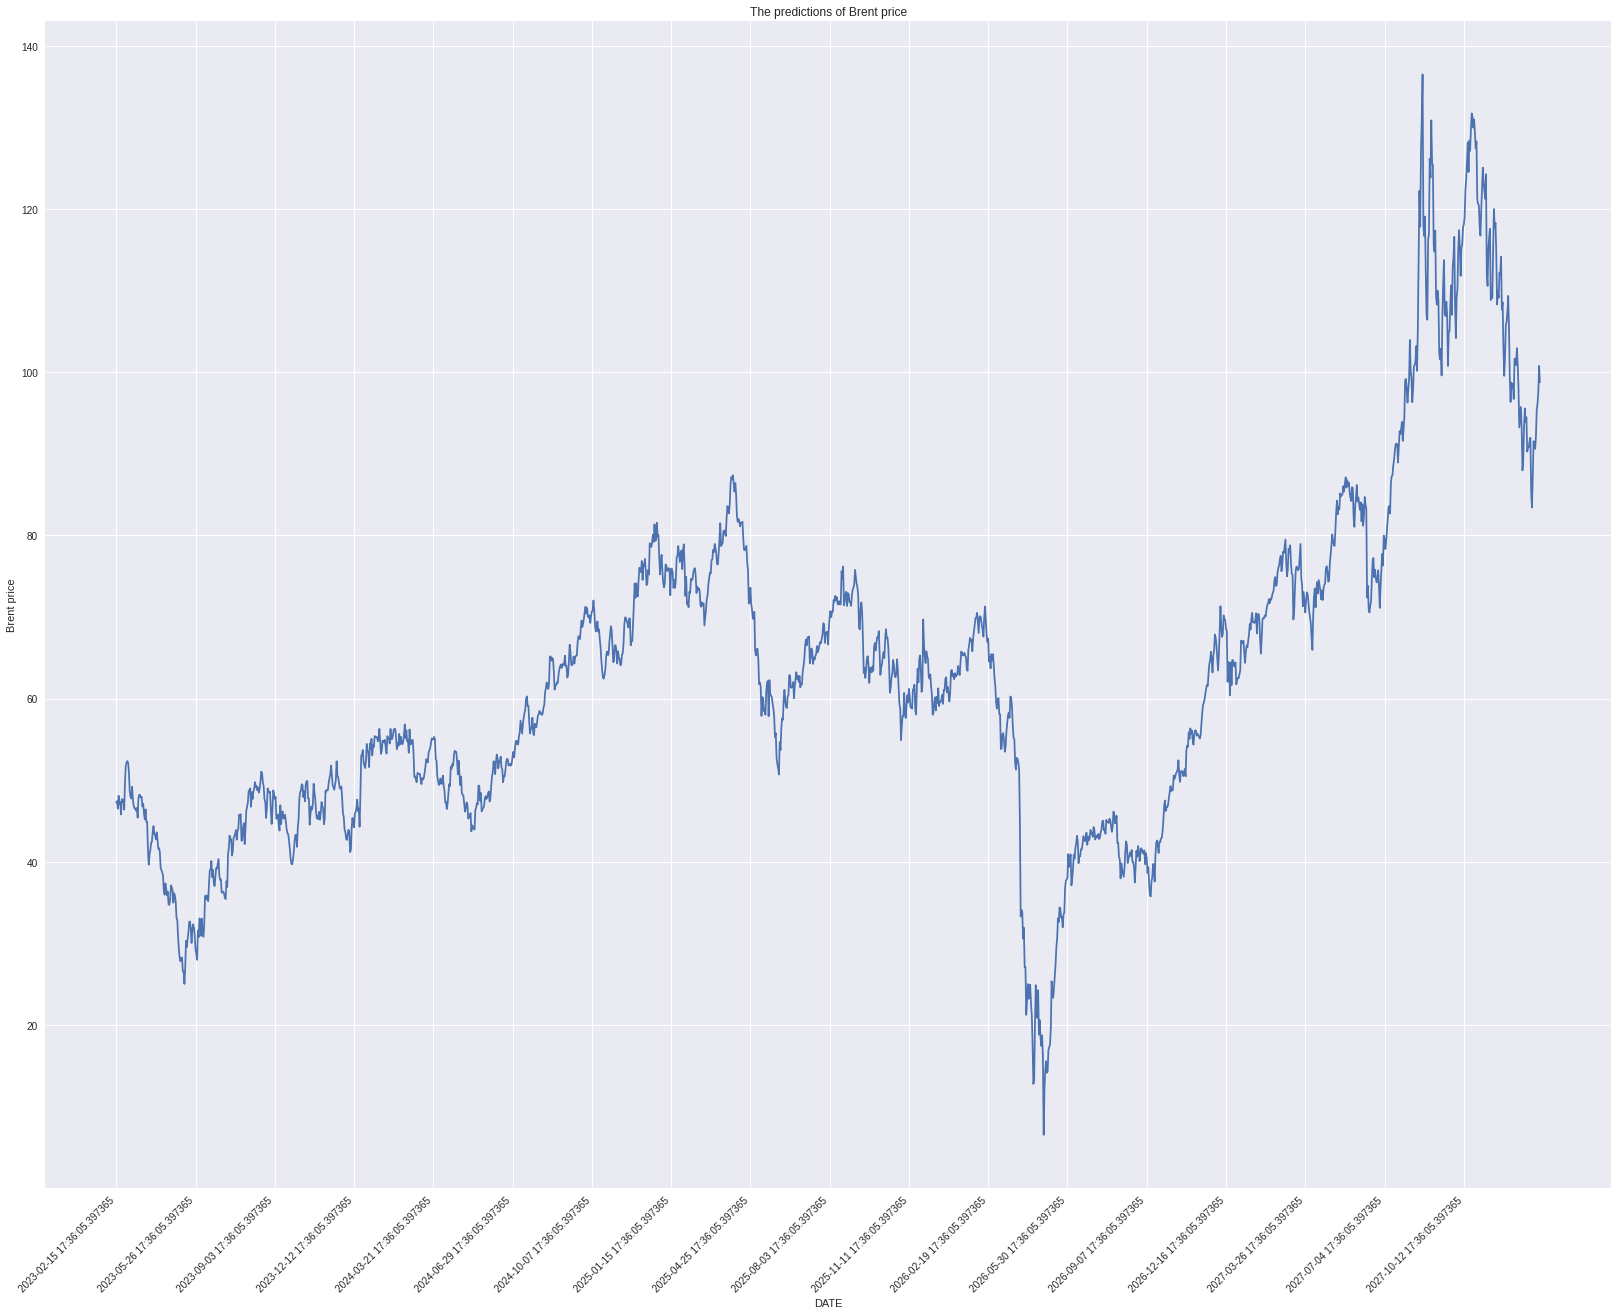

In [25]:
#visualize the Brent prices
plt.figure(figsize=(25,20))
plt.title('The predictions of Brent price')
plt.plot(predictions)
plt.xticks(pd.RangeIndex(0,1797,100), time[::100], rotation=45, ha='right', fontsize=10)
plt.xlabel('DATE')
plt.ylabel('Brent price')
plt.show()

In [29]:
from sklearn.model_selection import KFold

# Create an instance of the KFold class
kf = KFold(n_splits=5, shuffle=True)

# Split the training data into 5 folds
for train_index, test_index in kf.split(x_train):
  x_train_folds, x_test_folds = x_train[train_index], x_train[test_index]
  y_train_folds, y_test_folds = y_train[train_index], y_train[test_index]

  # Build the LSTM model
  model = Sequential()
  model.add(LSTM(2000, return_sequences=True, input_shape=(x_train_folds.shape[1], 1)))
  model.add(LSTM(2000, return_sequences=False))
  model.add(Dense(1000))
  model.add(Dense(500))
  model.add(Dense(1))

  # Compile the model
  model.compile(optimizer='adam', loss='mean_squared_error')

  # Train the model on the current fold
  model.fit(x_train_folds, y_train_folds, epochs=10, batch_size=32)

  # Evaluate the model on the test data of the current fold
  scores = model.evaluate(x_test_folds, y_test_folds, verbose=0)
  print("Score for fold ", i, ": ", scores)


Epoch 1/10
180/180 [==============================] - 12s 45ms/step - loss: 0.0637
Epoch 2/10
180/180 [==============================] - 8s 46ms/step - loss: 0.0026
Epoch 3/10
180/180 [==============================] - 8s 46ms/step - loss: 0.0028
Epoch 4/10
180/180 [==============================] - 8s 45ms/step - loss: 0.0023
Epoch 5/10
180/180 [==============================] - 8s 45ms/step - loss: 0.0019
Epoch 6/10
180/180 [==============================] - 8s 44ms/step - loss: 0.0019
Epoch 7/10
180/180 [==============================] - 8s 44ms/step - loss: 0.0017
Epoch 8/10
180/180 [==============================] - 8s 44ms/step - loss: 0.0022
Epoch 9/10
180/180 [==============================] - 8s 44ms/step - loss: 0.0019
Epoch 10/10
180/180 [==============================] - 8s 44ms/step - loss: 0.0032
Score for fold  4 :  0.004133839160203934
Epoch 1/10
180/180 [==============================] - 12s 44ms/step - loss: 0.1904
Epoch 2/10
180/180 [==============================] -

Epoch 1/10
38/38 [==============================] - 6s 45ms/step - loss: 0.3734
Epoch 2/10
38/38 [==============================] - 2s 44ms/step - loss: 0.0113
Epoch 3/10
38/38 [==============================] - 2s 45ms/step - loss: 0.0013
Epoch 4/10
38/38 [==============================] - 2s 46ms/step - loss: 0.0011
Epoch 5/10
38/38 [==============================] - 2s 46ms/step - loss: 0.0011
Epoch 6/10
38/38 [==============================] - 2s 45ms/step - loss: 0.0011
Epoch 7/10
38/38 [==============================] - 2s 46ms/step - loss: 0.0010
Epoch 8/10
38/38 [==============================] - 2s 46ms/step - loss: 0.0012
Epoch 9/10
38/38 [==============================] - 2s 46ms/step - loss: 0.0011
Epoch 10/10
38/38 [==============================] - 2s 47ms/step - loss: 0.0010
Score for fold  0 :  0.00020317232701927423
Epoch 1/10
75/75 [==============================] - 7s 44ms/step - loss: 0.1316
Epoch 2/10
75/75 [==============================] - 3s 44ms/step - loss: 7.

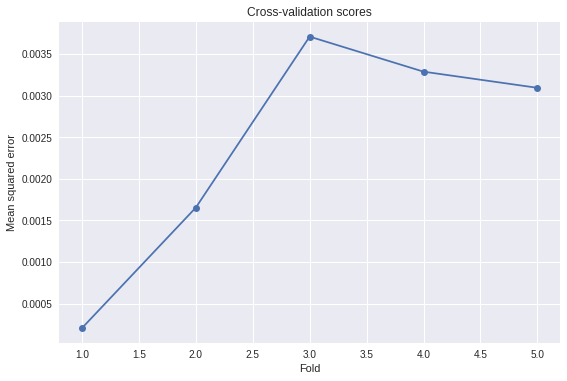

In [28]:
from sklearn.model_selection import TimeSeriesSplit
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import numpy as np

# Create an instance of the TimeSeriesSplit class
tscv = TimeSeriesSplit(n_splits=5)

# Initialize an empty list to store the cross-validation scores
scores = []

# Split the training data into 5 folds
for i, (train_index, test_index) in enumerate(tscv.split(x_train)):
    x_train_folds, x_test_folds = x_train[train_index], x_train[test_index]
    y_train_folds, y_test_folds = y_train[train_index], y_train[test_index]

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(2000, return_sequences=True, input_shape=(x_train_folds.shape[1], 1)))
    model.add(LSTM(2000, return_sequences=False))
    model.add(Dense(1000))
    model.add(Dense(500))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model on the current fold
    model.fit(x_train_folds, y_train_folds, epochs=10, batch_size=32)

    # Evaluate the model on the test data of the current fold
    score = model.evaluate(x_test_folds, y_test_folds, verbose=0)
    print("Score for fold ", i, ": ", score)
    scores.append(score)

# Plot the cross-validation scores
fig, ax = plt.subplots()
ax.plot(np.arange(1, len(scores)+1), scores, marker='o')
ax.set_title('Cross-validation scores')
ax.set_xlabel('Fold')
ax.set_ylabel('Mean squared error')
plt.show()
